In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

**Describe the problem you want to solve using data science techniques. Why is it important? How your ML model can help (e.g., reduce costs, increase quality, etc.)?**

Our task is to predict the probability of returning a plane ticket. This will help air service companies understand the actual expected number of passengers per flight, understand what size aircraft will be required, whether it is worth changing the plane, reducing or increasing the number of seats, and whether such a flight is convenient at all. In addition, some airlines are selling more tickets than planned for the flight. A good model will reduce risks, increase company profits and satisfy the largest number of passengers.

**1. Loading the data**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('onetwotrip_challenge_train.csv')

In [4]:
pd.options.display.max_columns = None
df

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,1,0,1,0,91,511,0.459223,1,4,33,7,2,3,1,1,17,1,1,3,1,0,3,1,1,0,1,0,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,1,0,0,8,5,16,-0.521242,1,0,1,5,2,5,1,1,23,1,1,12,3,0,4,1,1,0,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,1,0,1,12,2,12,-0.101043,3,7,3,5,2,5,1,1,2,3,1,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,1,0,0,23,12,3,-0.801375,2,53,1,6,2,3,1,51,23,2,1,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0


**2. Check data for NaNs and categorical variable. Check target variable.**

In [5]:
df.isna().sum()

orderid             0
userid              0
field0              0
field1              0
field2              0
field3              0
field4              0
field5              0
field6              0
field7              0
field8              0
field9              0
field10             0
field11             0
field12             0
field13             0
field14             0
field15             0
field16             0
field17             0
field18             0
field19             0
field20             0
field21             0
field22             0
field23             0
field24             0
field25             0
field26             0
field27             0
field28             0
field29             0
indicator_goal21    0
indicator_goal22    0
indicator_goal23    0
indicator_goal24    0
indicator_goal25    0
goal21              0
goal22              0
goal23              0
goal24              0
goal25              0
goal1               0
dtype: int64

In [6]:
df.dtypes

orderid               int64
userid               object
field0                int64
field1              float64
field2                int64
field3                int64
field4                int64
field5                int64
field6                int64
field7                int64
field8                int64
field9                int64
field10               int64
field11               int64
field12               int64
field13               int64
field14             float64
field15               int64
field16               int64
field17               int64
field18               int64
field19               int64
field20               int64
field21               int64
field22               int64
field23               int64
field24               int64
field25               int64
field26               int64
field27               int64
field28               int64
field29               int64
indicator_goal21      int64
indicator_goal22      int64
indicator_goal23      int64
indicator_goal24    

There are no NaNs in our data. And only 'userid' should be converted from object to int. There is no need to preprocess target variable - it already 1 column and binary format.

As from the beggining we don't have information about columns, so, to **generate new features** and explain why we are chosing them: we need some time to show what we can see from the data and understand to make conclusions about what else can be helpful.

**3. Exploratory analysis of the data**

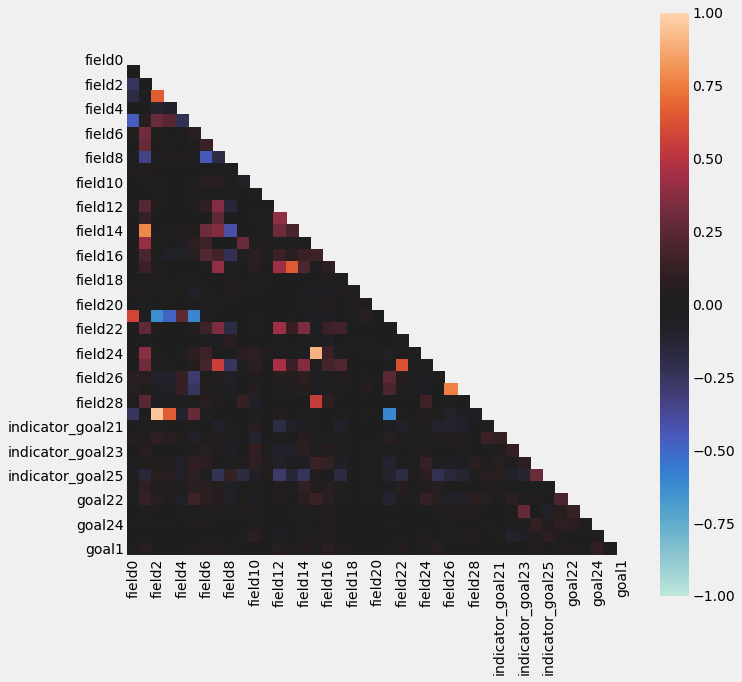

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[df.columns[2:]].corr(), vmin=-1, vmax=1, center= 0, square=True, mask = np.triu(df[df.columns[2:]].corr()));

We can see high correlation between field1 and field 14, field2 and field29, field15 and field24

In [8]:
df.describe()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
count,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000
mean,98027.500000,28.413163,0.000912,7.980363,7.867864,3.528966,0.556214,1.577911,1.265292,0.879366,0.023937,0.448117,14.633431,12.010492,27.046028,0.001822,1.517153,15.723854,3.001301,3.811941,2.076172,3.993762,1.226471,38.751938,13.028186,1.404645,4.923456,3.875780,1.746557,0.088572,2.980837,0.994966,0.979649,0.348676,0.645754,0.647687,0.036627,0.168579,0.038713,0.022519,0.015098,0.022142
std,56596.636526,69.603944,1.009651,2.757008,3.013659,12.692057,0.496831,5.614900,0.441489,0.325702,0.164366,0.497302,5.519693,19.579464,55.490962,1.007327,0.952774,25.689926,8.510708,1.931365,0.980940,1.975246,0.418548,71.517212,6.132370,0.784647,11.652149,4.230396,1.376456,0.369773,0.919229,0.070774,0.141199,0.476552,0.478285,0.477692,0.187845,0.374381,0.192912,0.148365,0.121942,0.147144
min,0.000000,0.000000,-0.859222,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.941441,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49013.750000,0.000000,-0.471365,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,4.000000,3.000000,-0.521242,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,98027.500000,0.000000,-0.238651,8.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,5.000000,4.000000,-0.241109,1.000000,6.000000,1.000000,4.000000,2.000000,4.000000,1.000000,17.000000,13.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,147041.250000,13.000000,0.149205,10.000000,10.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,19.000000,11.000000,26.000000,0.179090,2.000000,18.000000,1.000000,5.000000,3.000000,6.000000,1.000000,42.000000,18.000000,2.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,196055.000000,500.000000,82.142134,12.000000,12.000000,363.000000,1.000000,323.000000,2.000000,1.000000,4.000000,1.000000,23.000000,273.000000,746.000000,55.225183,18.000000,340.000000,156.000000,7.000000,8.000000,7.000000,2.000000,867.000000,23.000000,18.000000,170.000000,28.000000,7.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Binary Columns: field5(0,1), field7(1,2), field8(0,1), field10(0,1), field21(1,2)

Max value = 12: **field2, field3 ~ month**

Max value = 7: **field18, field20, field27 ~ days of the week**

Max value = 23: **field11 ~ hours**

Max values 500, 363 and 323: **field0, field4, field6 ~ probably they have a connection with days during the year**




Let's check days of the week:

In [9]:
day_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day = []
for i in range(7):
    day.append(day_week[df.field18.unique()[i] - 1])

day_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_1 = []
for i in range(7):
    day_1.append(day_week[df.field20.unique()[i] - 1])

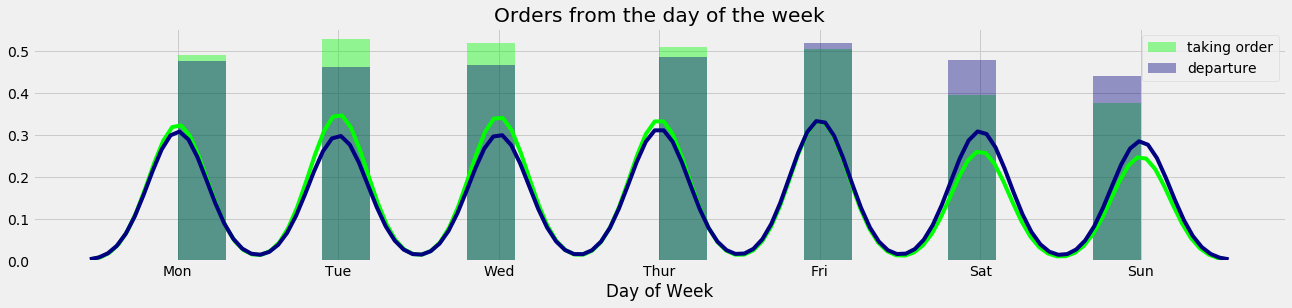

In [10]:
plt.figure(figsize=(20, 4))
plt.title('Orders from the day of the week')
sns.distplot(df.field18,  kde=True, label='taking order', bins = 20, color='lime')
plt.xlabel('Day of Week')
plt.xticks(df.field18.unique(), day);

sns.distplot(df.field20,  kde=True, label='departure',bins=20, color='navy')
plt.xlabel('Day of Week')
plt.xticks(df.field20.unique(), day_1)
plt.legend();

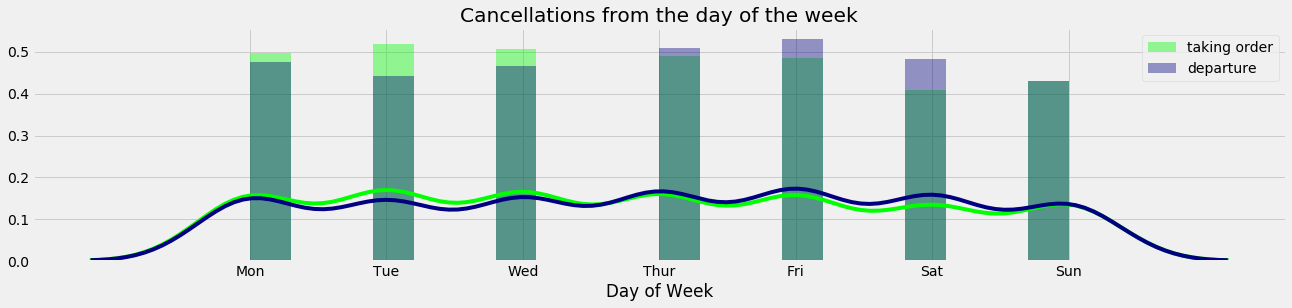

In [11]:
plt.figure(figsize=(20, 4))
plt.title('Сancellations from the day of the week')
sns.distplot(df.field18[df['goal1'] == 1],  kde=True, label='taking order', bins = 20, color='lime')
plt.xlabel('Day of Week')
plt.xticks(df.field18.unique(), day);

sns.distplot(df.field20[df['goal1'] == 1],  kde=True, label='departure',bins=20, color='navy')
plt.xlabel('Day of Week')
plt.xticks(df.field20.unique(), day_1)
plt.legend();

In [12]:
def relative(column, data):
    a = column.value_counts()
    data['a'] = column.map(a)
    b = column[data['goal1'] == 1].value_counts()
    data['b'] = column.map(b)
    data['b'] = data['b'].replace(np.NaN, 0)
    perc = data['b']/data['a']
    data = data.drop(['a','b'], axis=1, inplace=True)
    return perc

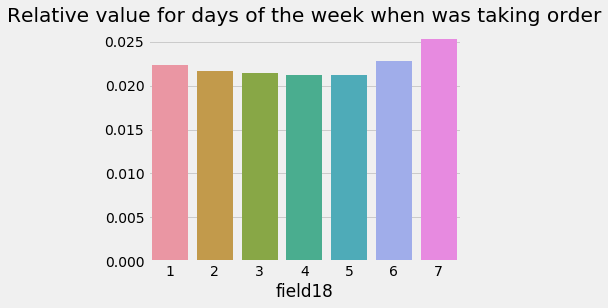

In [13]:
perc_day_week = relative(df.field18, df)
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Relative value for days of the week when was taking order')
sns.barplot(df.field18, perc_day_week, ax=ax);

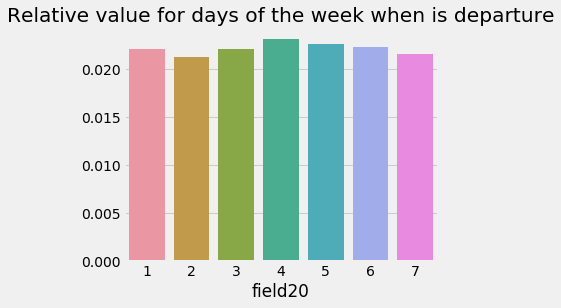

In [14]:
perc_day_week2 = relative(df.field20, df)
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Relative value for days of the week when is departure')
sns.barplot(df.field20, perc_day_week2, ax=ax);

We can see not high changes between days which can mean that this feature might not be realy helpful for us.

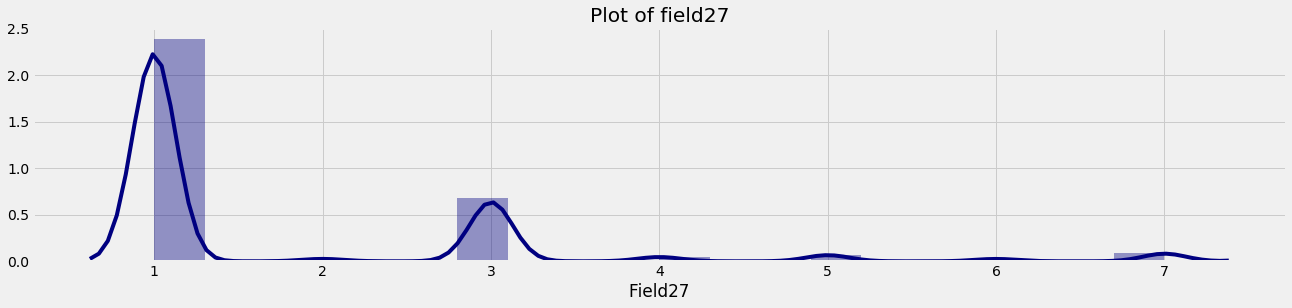

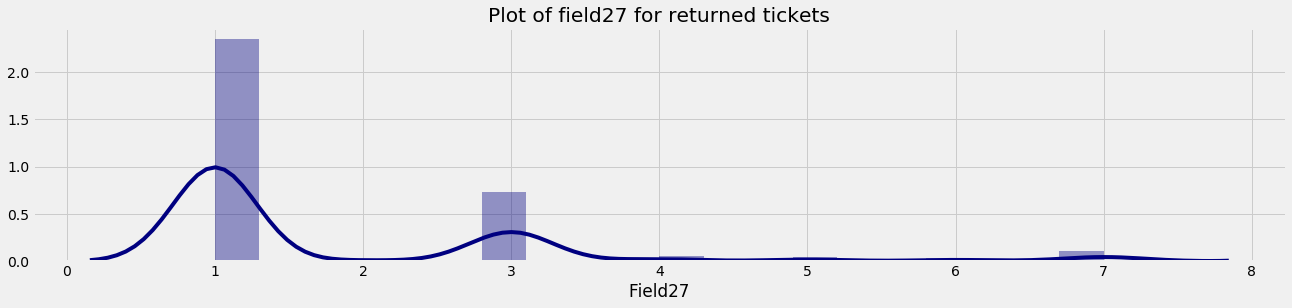

In [15]:
plt.figure(figsize=(20, 4))
plt.title('Plot of field27')
sns.distplot(df.field27,  kde=True, bins = 20, color='navy')
plt.xlabel('Field27');

plt.figure(figsize=(20, 4))
plt.title('Plot of field27 for returned tickets')
sns.distplot(df.field27[df.goal1 == 1],  kde=True, bins = 20, color='navy')
plt.xlabel('Field27');

Field27 - seems differently, maybe it is not a days of the week, but anyway feature show the dependance and let's leave it with us.

Let's check month:

In [16]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
srt_mnt = []
for i in range(12):
    srt_mnt.append(month[df.field3.unique()[i] - 1])

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
srt_mnt_1 = []
for i in range(12):
    srt_mnt_1.append(month[df.field2.unique()[i] - 1])

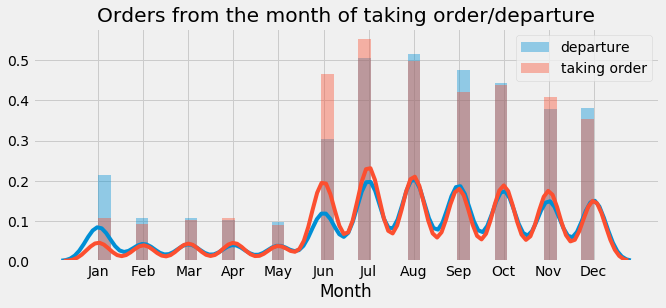

In [17]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field3,  kde=True, label = 'departure', bins=40)
plt.title('Orders from the month of taking order/departure')
plt.xlabel('Month')
plt.xticks(df.field3.unique(), srt_mnt)

sns.distplot(df.field2,  kde=True, label = 'taking order', bins=40)
plt.xlabel('Month')
plt.xticks(df.field2.unique(), srt_mnt_1);
plt.legend();

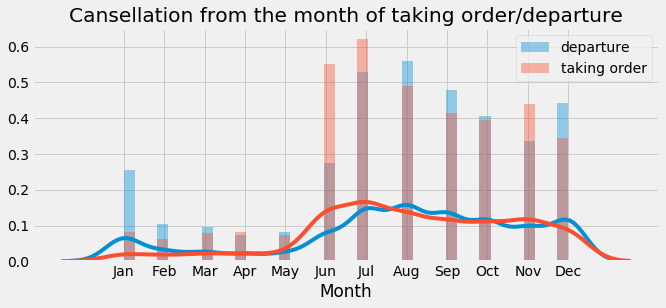

In [18]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field3[df['goal1'] == 1],  kde=True, label = 'departure', bins=40)
plt.title('Cansellation from the month of taking order/departure')
plt.xlabel('Month')
plt.xticks(df.field3.unique(), srt_mnt)

sns.distplot(df.field2[df['goal1'] == 1],  kde=True, label = 'taking order', bins=40)
plt.xlabel('Month')
plt.xticks(df.field2.unique(), srt_mnt_1);
plt.legend();

In [19]:
perc_month = relative(df.field3, df)
perc_month2 = relative(df.field2, df)

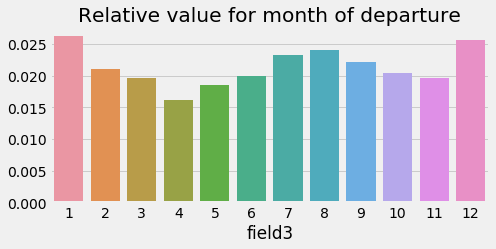

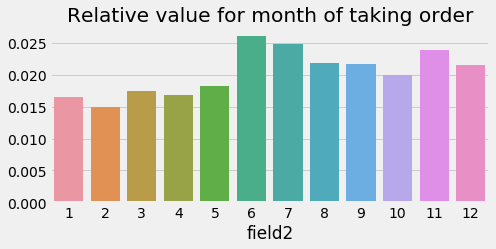

In [20]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for month of departure')
sns.barplot(df.field3, perc_month, ax=ax);

fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for month of taking order')
sns.barplot(df.field2, perc_month2, ax=ax);

We can see here that for December and January there was high amount of cansellation while there were not hihg amount of orders. 

This feature seems to be important for us.

In [21]:
df.field21.value_counts()  #this is a year of taking order

1    151655
2     44401
Name: field21, dtype: int64

So next, in part with feature generation, we can add a year to the month

As there was high correlation between field2 and field29, let's check field29:

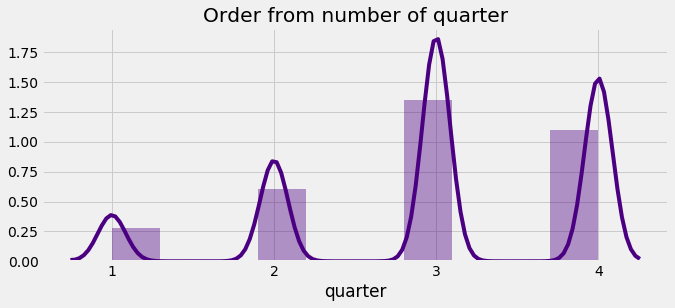

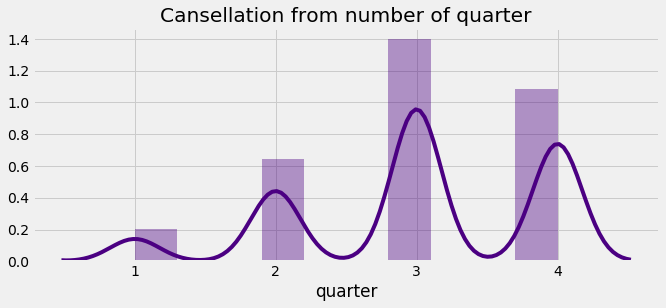

In [22]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field29,  kde=True, color = 'indigo',bins = 10)
plt.title('Order from number of quarter')
plt.xlabel('quarter')
plt.xticks(df.field29.unique());

plt.figure(figsize=(10, 4))
sns.distplot(df.field29[df['goal1'] == 1],  kde=True, color = 'indigo',bins = 10)
plt.title('Cansellation from number of quarter')
plt.xlabel('quarter')
plt.xticks(df.field29.unique());

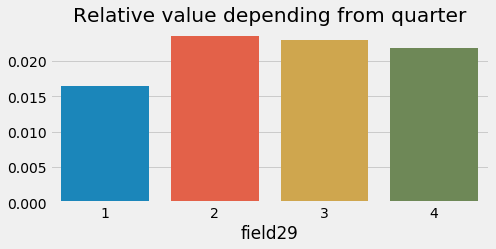

In [23]:
perc_quarter = relative(df.field29, df)
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value depending from quarter')
sns.barplot(df.field29, perc_quarter, ax=ax);

Well, here is an example when based on feature distribution it seems like influenced feature, but in percentage you can see not high different between all four seasons.

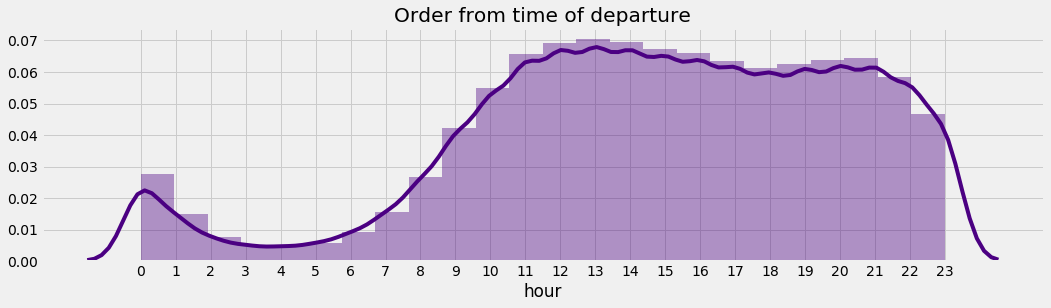

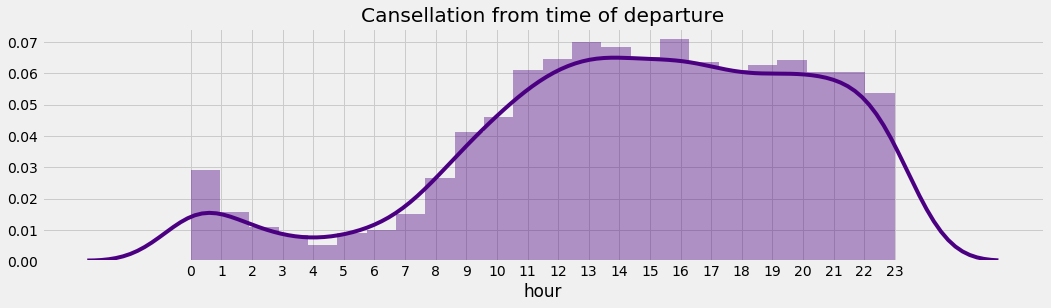

In [24]:
plt.figure(figsize=(16, 4))
plt.title('Order from time of departure')
sns.distplot(df.field11,  kde=True, bins=24, color= 'indigo')
plt.xlabel('hour')
plt.xticks(df.field11.unique());

plt.figure(figsize=(16, 4))
plt.title('Cansellation from time of departure')
sns.distplot(df.field11[df['goal1'] == 1],  kde=True, bins=24, color= 'indigo')
plt.xlabel('hour')
plt.xticks(df.field11.unique());

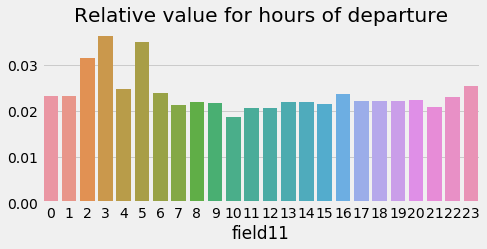

In [25]:
perc_hour = relative(df.field11, df)
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for hours of departure')
sns.barplot(df.field11, perc_hour, ax=ax);

We can see an interesting thing here, despite the fact that most tickets are bought for night-time, percent of returned ticket bigger during night and morning. Maybe this is a clear visualization of how much people want to sleep and that this is important. So before you  will take a flight at night - think twice  

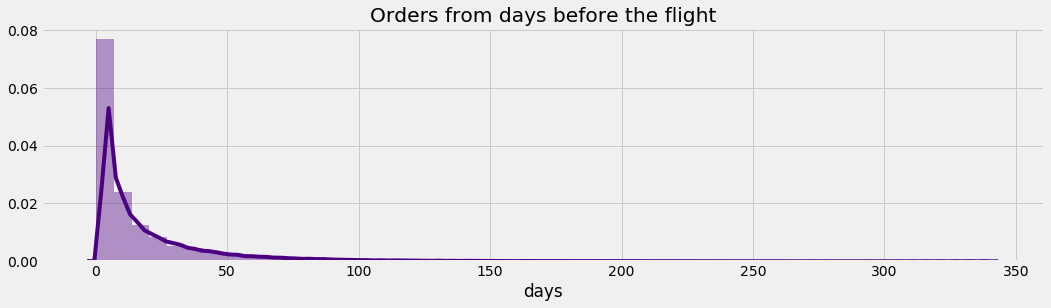

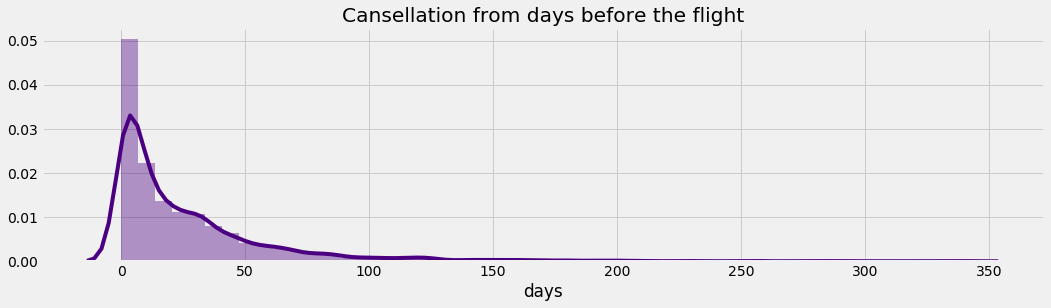

In [26]:
plt.figure(figsize=(16, 4))
plt.title('Orders from days before the flight')
sns.distplot(df.field16,  kde=True, color= 'indigo')
plt.xlabel('days');

plt.figure(figsize=(16, 4))
plt.title('Cansellation from days before the flight')
sns.distplot(df.field16[df['goal1'] == 1],  kde=True, color= 'indigo')
plt.xlabel('days');

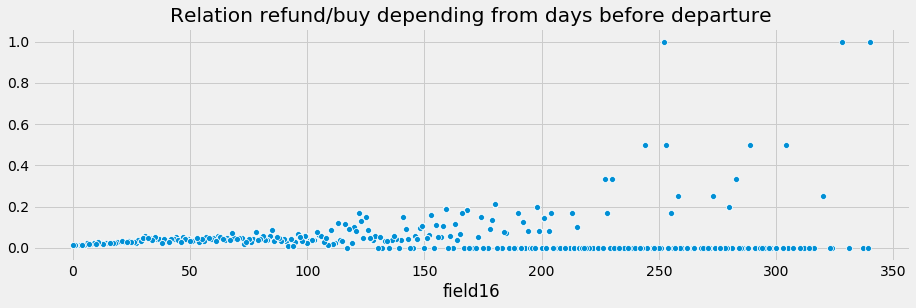

In [27]:
perc_day_before_fly = relative(df.field16, df)
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Relation refund/buy depending from days before departure')
sns.scatterplot(df['field16'], perc_day_before_fly, ax=ax);

From the destribution it was already clear that this feature is important, but when we divide the number of people who refund the ticket by all people who bought, became visible another dependancy - when there are more than 180 days before flight people are more ofther refund their tickets. We will use this information in feature generation.

Chiiild

In [83]:
df['field9'].value_counts() #tickts for children under 1 y.o.

0    191706
1      4018
2       325
4         4
3         3
Name: field9, dtype: int64

In [84]:
df['field28'].value_counts()    #tickets for children from 2 to 6 y.o.

0    182987
1      9535
2      3079
3       219
4       203
6        21
5         6
8         5
7         1
Name: field28, dtype: int64

In [28]:
df['child'] = df['field9'] + df['field28']
# df.child[df['goal1'] == 1]

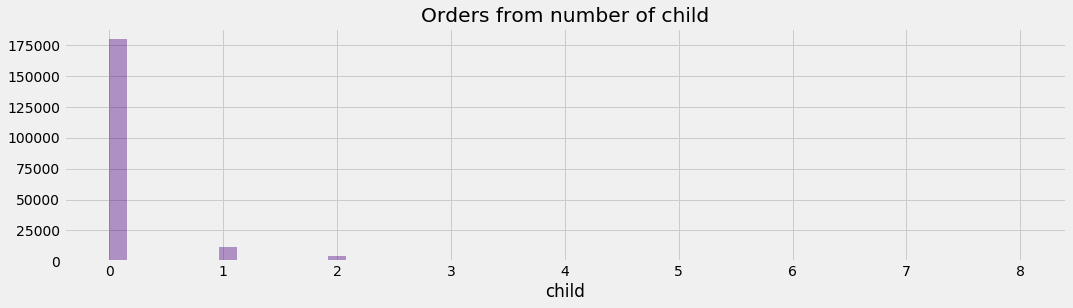

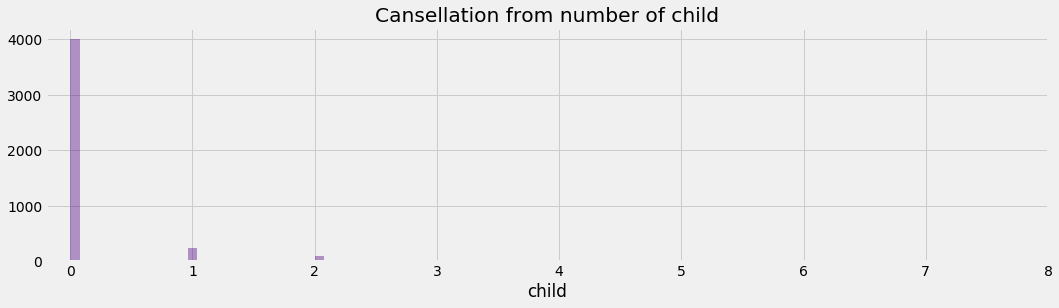

In [29]:
plt.figure(figsize=(16, 4))
plt.title('Orders from number of child')
sns.distplot(df['child'],  kde=False, color = 'indigo')
plt.xticks(df['child'].unique());

plt.figure(figsize=(16, 4))
plt.title('Cansellation from number of child')
sns.distplot(df.child[df['goal1'] == 1],  kde=False, color = 'indigo')
# plt.xlabel('Number of childs')
plt.xticks(df.child.unique());

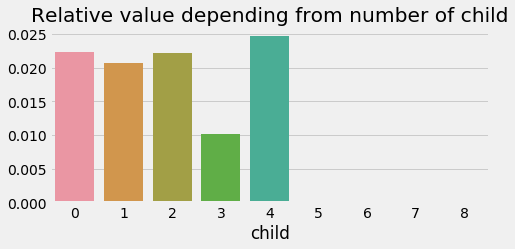

In [30]:
perc_child = relative(df['child'], df)
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value depending from number of child')
sns.barplot(df['child'], perc_child, ax=ax);

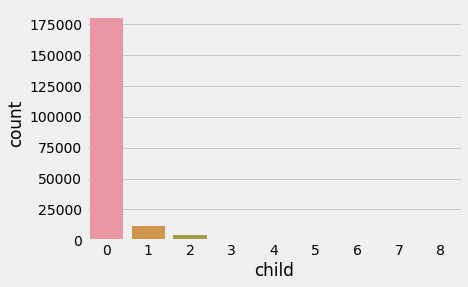

In [31]:
sns.countplot(df['child']);

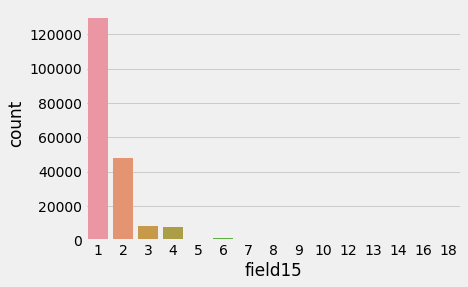

In [32]:
sns.countplot(df['field15']);

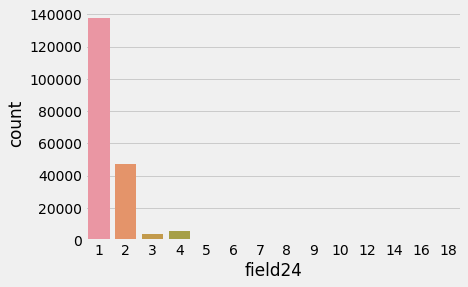

In [33]:
sns.countplot(df['field24']);

здесь надо как то объяснить, что field15 - это все билеты, включающие field24 (билеты взрослых) и df['child'] (которая filed28+field9 - билеты детей)


это нужно чтобы потом новую фичу сделать: примерная стоимость билета (field1 / fielf15)

In [34]:
sum(df['field15'] - df['field24'] - df['field28'] - df['field9'])

0

вывод

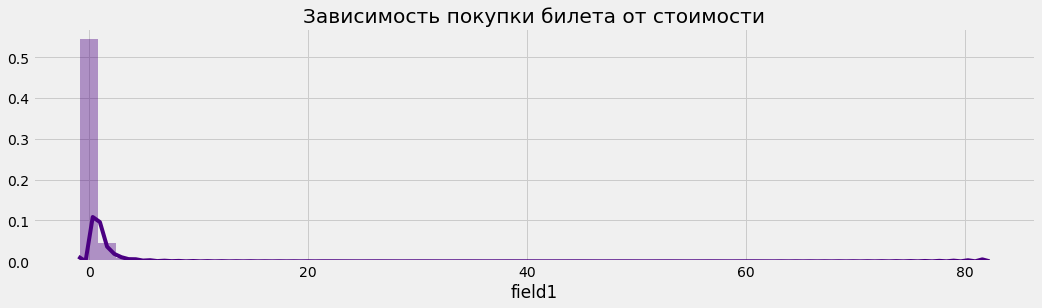

In [35]:
plt.figure(figsize=(16, 4))
plt.title('Зависимость покупки билета от стоимости')
sns.distplot(df.field1,  kde=True, color = 'indigo')

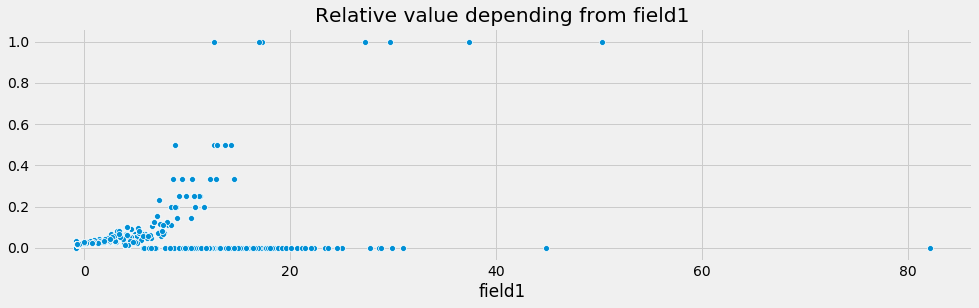

In [36]:
perc_field1 = relative(df.field1, df)
fig, ax = plt.subplots(figsize=(15, 4))
plt.title('Relative value depending from field1')
sns.scatterplot(df.field1, perc_field1, ax=ax);

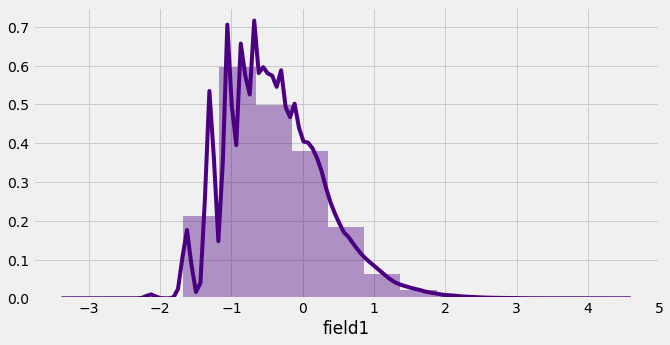

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(np.log(df['field1'] + 0.9), bins=15, color = 'indigo');

крч здесь нужно сделать как-то вывод о том, что firld1 это scaled цена покупки (order) (в нем может быть несколько билетов)

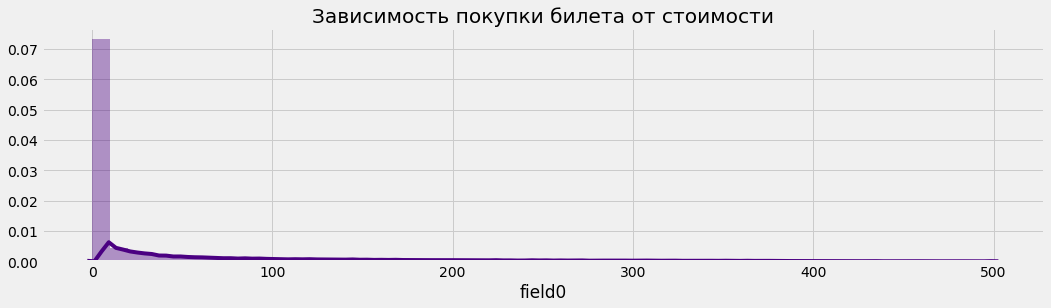

In [38]:
plt.figure(figsize=(16, 4))
plt.title('Зависимость покупки билета от стоимости')
sns.distplot(df.field0,  kde=True, color = 'indigo')

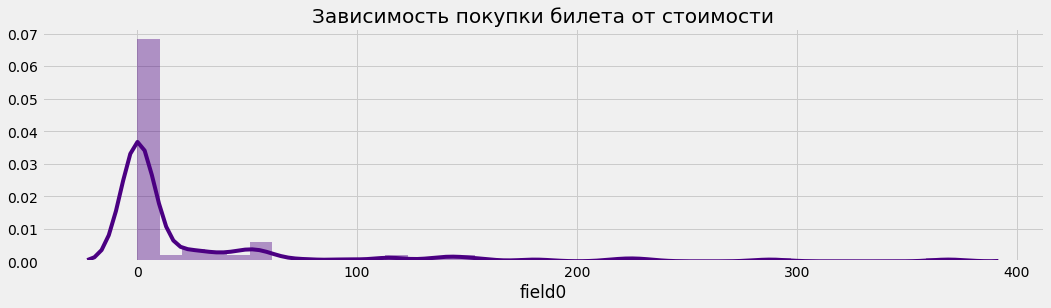

In [39]:
plt.figure(figsize=(16, 4))
plt.title('Зависимость покупки билета от стоимости')
sns.distplot(df.field0[:100],  kde=True, color = 'indigo')


**New features**

**Feature1**: number of tickets for each person: how many tickets he/she bought

In [40]:
tickets_per_person = df['userid'].value_counts()
df['tickets_per_person'] = df['userid'].map(tickets_per_person)
df['tickets_per_person'].value_counts()

1     78149
2     41418
3     21171
4     12764
5      7970
      ...  
61       61
58       58
57       57
54       54
49       49
Name: tickets_per_person, Length: 71, dtype: int64

In [41]:
tickets_per_person.unique()

array([363, 222, 185, 177, 149, 145, 130, 122, 110, 106,  96,  88,  80,
        79,  70,  65,  64,  61,  58,  57,  54,  53,  52,  50,  49,  48,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,
        32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,  20,
        19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,
         6,   5,   4,   3,   2,   1], dtype=int64)

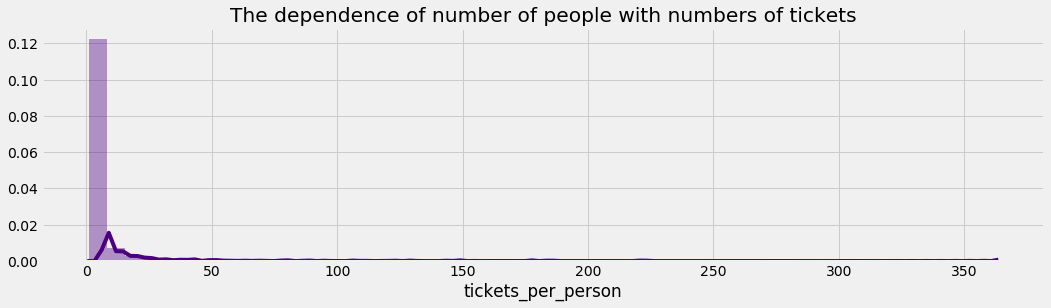

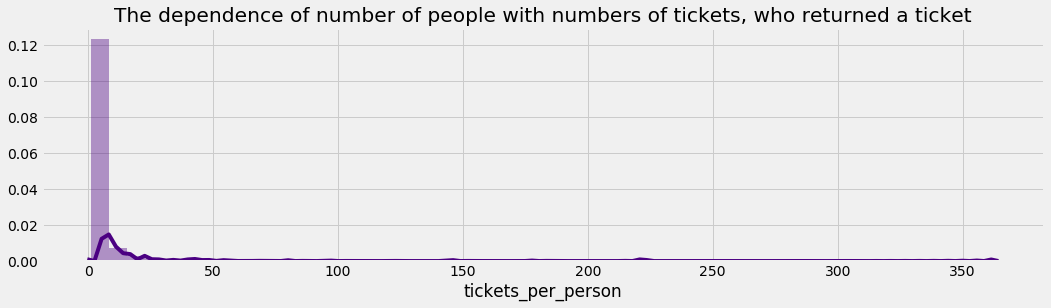

In [42]:
plt.figure(figsize=(16, 4))
plt.title('The dependence of number of people with numbers of tickets')
sns.distplot(df['tickets_per_person'],  kde=True, color= 'indigo')
# plt.xlabel('percent');

plt.figure(figsize=(16, 4))
plt.title('The dependence of number of people with numbers of tickets, who returned a ticket')
sns.distplot(df['tickets_per_person'][df.goal1 == 1],  kde=True, color= 'indigo')
# plt.xlabel('percent');

In [43]:
# refund_people = df['tickets_per_person'][df.goal1 == 1].value_counts()
# df['refund_people'] = df['tickets_per_person'].map(refund_people)

In [44]:
# all_people = df['tickets_per_person'].value_counts()
# df['all_people'] = df['tickets_per_person'].map(all_people)

In [45]:
# perc = df['refund_people']/df['all_people']
# perc

In [46]:
perc_tick_pers = relative(df['tickets_per_person'], df)

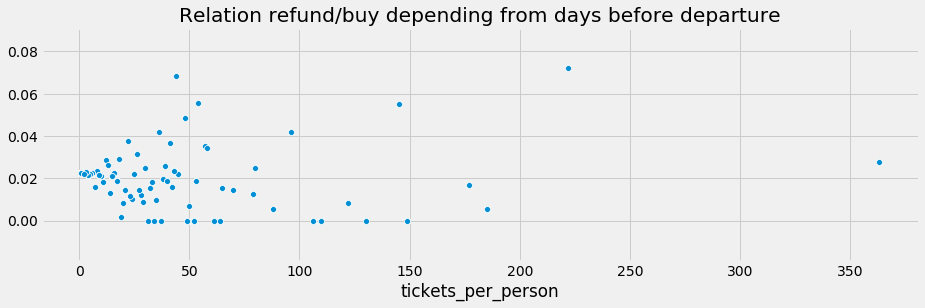

In [47]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Relation refund/buy depending from days before departure')
sns.scatterplot(df['tickets_per_person'], perc_tick_pers, ax=ax);

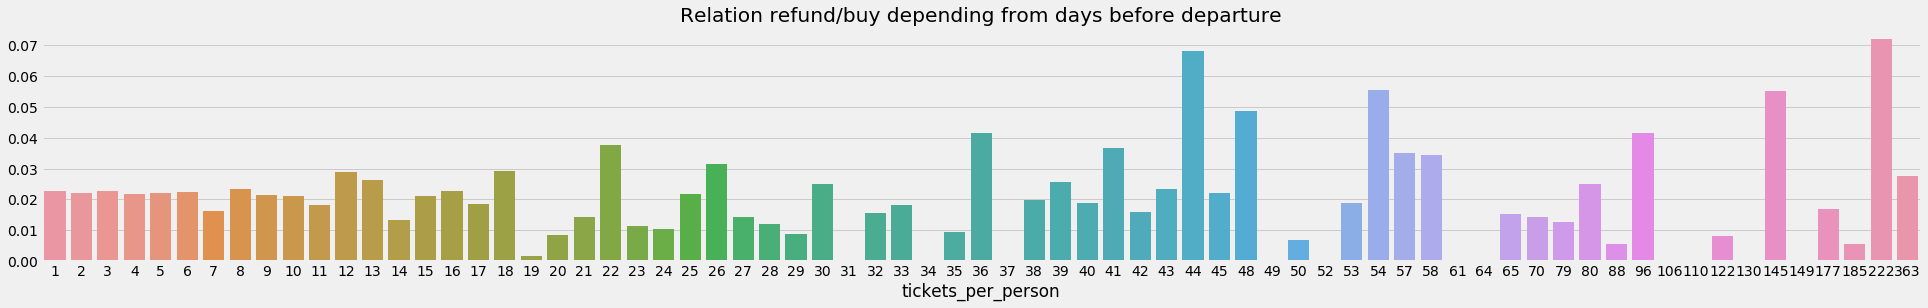

In [48]:
fig, ax = plt.subplots(figsize=(30, 4))
plt.title('Relation refund/buy depending from days before departure')
sns.barplot(df['tickets_per_person'], perc_tick_pers, ax=ax);

The conclusion here is that people with higher number of tickets more ofter refund them. That is why this feature is important

**Feature 2**: approximate cost for one ticket

In [49]:
df['ticket_price'] = df['field1'] / df['field15']

**Feature 3**: based on field1 - cost of the order and relative plot which showed that for bigger cost - ticket refund happens more often

In [50]:
df['perc_field1'] = perc_field1

df['new_field1'] = perc_field1
df['new_field1'][df.perc_field1 <= 0.2] = 0
df['new_field1'][df.perc_field1 > 0.2] = 1

**Feature 4**: based on field16 - days before flight and relative plot which showed that for more days before flight people refund tickets more often

In [51]:
df['perc_day_before_fly'] = perc_day_before_fly

df['new_field16'] = perc_day_before_fly
df['new_field16'][df.field16 <= 180] = 0
df['new_field16'][df.field16 > 180] = 1

**Feature 5**: adding a year to the month

In [52]:
df.field2.value_counts(), df.field3.value_counts()

(7     29790
 8     26808
 6     25113
 10    23578
 9     22752
 11    22003
 12    19065
 1      5854
 4      5777
 3      5490
 2      4999
 5      4827
 Name: field2, dtype: int64,
 8     27843
 7     27280
 9     25683
 10    23877
 12    20568
 11    20418
 6     16410
 1     11557
 2      5871
 3      5746
 4      5505
 5      5298
 Name: field3, dtype: int64)

In [53]:
df.loc[df['field21']==1,'field2'] = df['field2'] + 12 # Добавим фичу с месяцем покупки ко второму году
df.loc[df['field21']==1,'field3'] = df['field3'] + 12 # Добавим фичу с месяцем вылета ко второму году
df.field2.value_counts(), df.field3.value_counts()

(19    25467
 20    23056
 23    22003
 22    21988
 18    20429
 21    19647
 24    19065
 1      5854
 4      5777
 3      5490
 2      4999
 5      4827
 6      4684
 7      4323
 8      3752
 9      3105
 10     1590
 Name: field2, dtype: int64,
 20    23628
 19    22471
 21    21834
 22    21305
 24    20568
 23    20418
 18    11727
 13     7335
 4      5251
 3      5108
 5      5090
 7      4809
 6      4683
 2      4602
 1      4222
 8      4215
 9      3849
 10     2572
 14     1269
 15      638
 16      254
 17      208
 Name: field3, dtype: int64)

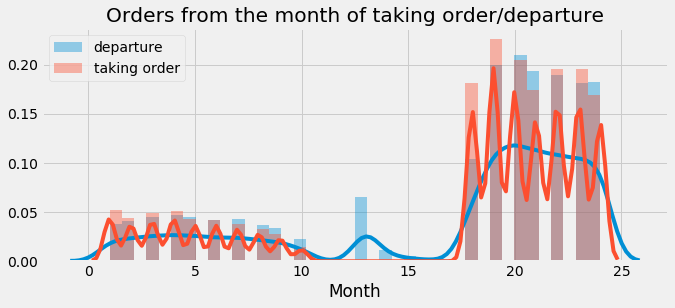

In [54]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field3,  kde=True, label = 'departure', bins=40)
plt.title('Orders from the month of taking order/departure')
plt.xlabel('Month')
# plt.xticks(df.field3.unique(), srt_mnt)

sns.distplot(df.field2,  kde=True, label = 'taking order', bins=40)
plt.xlabel('Month')
# plt.xticks(df.field2.unique(), srt_mnt_1);
plt.legend();

**Feature 6: statistical**

field0 - days after previous order, field16 - days before next flight

In [55]:
for f in ['field0','field16']: 
        df['{}_max'.format(f)] = df['userid'].map(df.groupby('userid')[f].max())
        df['{}_min'.format(f)] = df['userid'].map(df.groupby('userid')[f].min())
        df['{}_range'.format(f)] = df['{}_max'.format(f)]- df['{}_min'.format(f)]
        del df['{}_min'.format(f)],df['{}_max'.format(f)]

In [56]:
df

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,child,tickets_per_person,ticket_price,perc_field1,new_field1,field0_range,field16_range
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,23,24,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0,0,1,-0.626508,0.013363,0.0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0,0,2,-0.393794,0.019582,0.0,144,17
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0,0,2,-0.548937,0.017526,0.0,134,1
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,22,23,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0,0,3,-0.119326,0.021850,0.0,283,18
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,20,23,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0,0,1,-0.704079,0.018182,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,19,19,2,0,0,2,1,0,1,0,91,511,0.459223,1,4,33,7,2,3,1,1,17,1,1,3,1,0,3,1,1,0,1,0,0,0,0,0,0,0,0,4,-0.083509,0.021404,0.0,64,3
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,23,23,2,0,0,1,1,0,0,8,5,16,-0.521242,1,0,1,5,2,5,1,1,23,1,1,12,3,0,4,1,1,0,0,0,0,0,0,0,0,0,0,2,-0.548937,0.017526,0.0,104,17
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,21,21,3,0,0,2,1,0,1,12,2,12,-0.101043,3,7,3,5,2,5,1,1,2,3,1,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0,0,3,0.230735,0.021932,0.0,12,5
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,23,13,1,1,0,1,1,0,0,23,12,3,-0.801375,2,53,1,6,2,3,1,51,23,2,1,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0,0,3,-0.352040,0.018182,0.0,71,40


In [57]:
X = df.drop(['goal1', 'orderid', 'userid'], axis = 1)
y = df.goal1

In [58]:
#X = X.drop(['refund_people'], axis = 1)
#X_train = X_train.drop(['refund_people'], axis = 1)
#X_test = X_test.drop(['refund_people'], axis = 1)

In [59]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(pd.concat([X_train['userid'],X_test['userid']]))
#X_train['userid'] = le.transform(X_train['userid'])
#X_test['userid'] = le.transform(X_test['userid'])
#X['userid'] = le.transform(X['userid'])

Теперь мы построим 4 модели и выберем лучшую.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Логистическая регрессия

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(penalty='l2')
scor_clf_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scor_clf_roc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')

In [62]:
print('roc_auc_score is:', scor_clf_roc.mean())
print('accuracy is:', scor_clf_acc.mean())

roc_auc_score is: 0.6032916759412046
accuracy is: 0.9777818584764111


In [63]:
(y[y == 0].shape[0])/(y.shape[0])*100

97.78583669971844

Accuracy is not informative for this problem, since we have imbalanced classes. We have almost 98% of zeros in our dataset.
So, we will choose roc-auc metric, because this metric is not sensitive for class distribution (it does not matter how imbalance our classes are).

Now we will find the best hyperparameters for LogisticRegression model.



In [64]:
import time

In [65]:
%%time
from sklearn.model_selection import GridSearchCV
C_s = np.logspace(-2, 4, 7)
clf_grid = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=clf_grid, param_grid=dict(C=C_s),scoring='roc_auc')
grid.fit(X, y)
print('best score is:', grid.best_score_)
print('best C is:',grid.best_estimator_.C)

best score is: 0.6046676331298346
best C is: 10.0
Wall time: 2min 15s


In [66]:
clf_best = LogisticRegression(penalty='l2', C = grid.best_estimator_.C)
scor_clf_best_roc = cross_val_score(clf_best, X, y, cv=5, scoring='roc_auc')
print('best_roc_auc_score is:', scor_clf_best_roc.mean())

best_roc_auc_score is: 0.6046676331298346


In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
clf_b = LogisticRegression(penalty='l2')
clf_b.fit(X_train, y_train)
y_pred_clf = clf_b.predict_proba(X_test)[:,1]

In [69]:
def get_imp_value(model, df):
    imp = {}
    for i in range(len(df.columns)):
        imp.update({df.columns[i]:abs(model.coef_[i])})
    return sorted(imp.items(), key = lambda item: item[1])[::-1][:5]

In [70]:
clf_b.coef_

array([[-1.92367493e-03,  6.95564298e-02, -2.02861260e-02,
         1.64147401e-02,  1.26174645e-02, -4.46280310e-02,
        -2.26998823e-03, -1.43568317e-01, -1.42251982e-01,
         5.33513143e-03, -1.60610248e-01, -2.06475919e-02,
         2.76452910e-03, -2.14501988e-03,  8.47115656e-02,
        -1.61675165e-01,  7.63798870e-03,  2.02940832e-02,
        -8.97794624e-02, -2.45983163e-01, -1.04033795e-01,
        -3.54638333e-01,  4.30754221e-04, -1.42414650e-02,
        -1.23976088e-01, -8.11524436e-06,  2.91162311e-02,
        -8.62528533e-02, -4.30342086e-02, -1.48442900e-01,
        -1.71802734e-01, -1.53248264e-01, -5.59677125e-02,
         4.81277753e-02, -9.39850413e-02,  3.75877581e-02,
         7.72617549e-02,  1.15855527e-03,  1.46780191e-01,
        -1.08196145e-02, -3.76990772e-02, -9.78443849e-03,
         8.06743032e-02,  2.84232897e-03,  7.63180888e-03,
        -6.04398773e-04,  3.99514052e-03]])

2.Knn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
scor_neigh_roc = cross_val_score(neigh, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_neigh_roc.mean())

roc_auc_score is: 0.528817380321821


In [72]:
N = np.array([8,9,10,11,12])
model_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=model_knn, param_grid=dict(n_neighbors=N), scoring='roc_auc')
grid_knn.fit(X, y)
print('best score is:', grid_knn.best_score_)
print('best n_neighbors is:', grid_knn.best_estimator_.n_neighbors)

best score is: 0.5561667600231073
best n_neighbors is: 12


In [73]:
neigh_best_cross = KNeighborsClassifier(n_neighbors = grid_knn.best_estimator_.n_neighbors)
scor_neigh_best_cross_roc = cross_val_score(neigh_best_cross, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_neigh_best_cross_roc.mean())

roc_auc_score is: 0.5561667600231073


In [74]:
neigh_best_cross.fit(X_train, y_train)
y_pred_neigh = neigh_best_cross.predict_proba(X_test)[:,1]
print('roc_auc_score is:', roc_auc_score(y_test, neigh_best_cross.predict_proba(X_test)[:,1]))

roc_auc_score is: 0.5451075660852281


3.Лес

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 5, random_state = 42, n_estimators = 10)
scor_forest_roc = cross_val_score(forest, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_forest_roc.mean())

roc_auc_score is: 0.6908320673558694


In [76]:
%%time
param_grid = {'max_depth': range(4, 10), 'n_estimators': range(8, 15)}
grid_forest = GridSearchCV(estimator=forest, param_grid=param_grid, scoring = 'roc_auc')
grid_forest.fit(X, y)
print('best score is:', grid_forest.best_score_)
print('best depth and estimators is:',grid_forest.best_estimator_.max_depth, grid_forest.best_estimator_.n_estimators)

best score is: 0.700979582502289
best depth and estimators is: 9 14
Wall time: 7min 53s


In [77]:
forest_b = RandomForestClassifier(max_depth = grid_forest.best_estimator_.max_depth, random_state = 42, n_estimators = grid_forest.best_estimator_.n_estimators)
scor_forest_b_roc = cross_val_score(forest_b, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_forest_b_roc.mean())

roc_auc_score is: 0.700979582502289


In [78]:
forest_b.fit(X_train, y_train)
y_pred_forest = forest_b.predict_proba(X_test)[:,1]
roc_auc_score(y_test, forest_b.predict_proba(X_test)[:,1])

0.7055376612108102

4.Catboost

In [79]:
!pip install catboost
from catboost import CatBoostClassifier
from IPython.display import clear_output
clear_output()

In [80]:
cat = CatBoostClassifier(learning_rate=0.02, depth = 8, random_state=42, iterations=1000)
scor_cat_roc = cross_val_score(cat, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_cat_roc.mean())

0:	learn: 0.6573883	total: 164ms	remaining: 2m 43s
1:	learn: 0.6236476	total: 252ms	remaining: 2m 5s
2:	learn: 0.5919287	total: 345ms	remaining: 1m 54s
3:	learn: 0.5620384	total: 433ms	remaining: 1m 47s
4:	learn: 0.5341989	total: 527ms	remaining: 1m 44s
5:	learn: 0.5079796	total: 615ms	remaining: 1m 41s
6:	learn: 0.4836285	total: 704ms	remaining: 1m 39s
7:	learn: 0.4598930	total: 792ms	remaining: 1m 38s
8:	learn: 0.4381203	total: 897ms	remaining: 1m 38s
9:	learn: 0.4179797	total: 989ms	remaining: 1m 37s
10:	learn: 0.3990443	total: 1.07s	remaining: 1m 36s
11:	learn: 0.3807885	total: 1.17s	remaining: 1m 36s
12:	learn: 0.3641473	total: 1.26s	remaining: 1m 35s
13:	learn: 0.3487274	total: 1.35s	remaining: 1m 35s
14:	learn: 0.3343176	total: 1.44s	remaining: 1m 34s
15:	learn: 0.3203905	total: 1.53s	remaining: 1m 33s
16:	learn: 0.3077137	total: 1.61s	remaining: 1m 33s
17:	learn: 0.2956896	total: 1.7s	remaining: 1m 32s
18:	learn: 0.2843945	total: 1.8s	remaining: 1m 33s
19:	learn: 0.2735870	tota

158:	learn: 0.0973368	total: 15.2s	remaining: 1m 20s
159:	learn: 0.0972923	total: 15.3s	remaining: 1m 20s
160:	learn: 0.0972389	total: 15.4s	remaining: 1m 20s
161:	learn: 0.0972031	total: 15.5s	remaining: 1m 20s
162:	learn: 0.0971700	total: 15.6s	remaining: 1m 20s
163:	learn: 0.0971374	total: 15.7s	remaining: 1m 20s
164:	learn: 0.0971081	total: 15.8s	remaining: 1m 20s
165:	learn: 0.0970858	total: 15.9s	remaining: 1m 19s
166:	learn: 0.0970465	total: 16s	remaining: 1m 19s
167:	learn: 0.0970059	total: 16.1s	remaining: 1m 19s
168:	learn: 0.0969683	total: 16.2s	remaining: 1m 19s
169:	learn: 0.0969332	total: 16.3s	remaining: 1m 19s
170:	learn: 0.0969116	total: 16.4s	remaining: 1m 19s
171:	learn: 0.0968838	total: 16.5s	remaining: 1m 19s
172:	learn: 0.0968559	total: 16.6s	remaining: 1m 19s
173:	learn: 0.0968088	total: 16.7s	remaining: 1m 19s
174:	learn: 0.0967738	total: 16.8s	remaining: 1m 19s
175:	learn: 0.0967412	total: 16.9s	remaining: 1m 19s
176:	learn: 0.0967190	total: 17s	remaining: 1m 1

316:	learn: 0.0939875	total: 30.3s	remaining: 1m 5s
317:	learn: 0.0939682	total: 30.4s	remaining: 1m 5s
318:	learn: 0.0939610	total: 30.5s	remaining: 1m 5s
319:	learn: 0.0939435	total: 30.6s	remaining: 1m 4s
320:	learn: 0.0939293	total: 30.7s	remaining: 1m 4s
321:	learn: 0.0939153	total: 30.8s	remaining: 1m 4s
322:	learn: 0.0939081	total: 30.9s	remaining: 1m 4s
323:	learn: 0.0938959	total: 30.9s	remaining: 1m 4s
324:	learn: 0.0938660	total: 31s	remaining: 1m 4s
325:	learn: 0.0938485	total: 31.1s	remaining: 1m 4s
326:	learn: 0.0938309	total: 31.2s	remaining: 1m 4s
327:	learn: 0.0938139	total: 31.3s	remaining: 1m 4s
328:	learn: 0.0938006	total: 31.4s	remaining: 1m 4s
329:	learn: 0.0937833	total: 31.5s	remaining: 1m 3s
330:	learn: 0.0937581	total: 31.6s	remaining: 1m 3s
331:	learn: 0.0937480	total: 31.7s	remaining: 1m 3s
332:	learn: 0.0937329	total: 31.8s	remaining: 1m 3s
333:	learn: 0.0937120	total: 31.9s	remaining: 1m 3s
334:	learn: 0.0936782	total: 32s	remaining: 1m 3s
335:	learn: 0.09

476:	learn: 0.0916612	total: 45.5s	remaining: 49.9s
477:	learn: 0.0916507	total: 45.6s	remaining: 49.8s
478:	learn: 0.0916216	total: 45.7s	remaining: 49.7s
479:	learn: 0.0916091	total: 45.8s	remaining: 49.6s
480:	learn: 0.0915904	total: 45.9s	remaining: 49.5s
481:	learn: 0.0915798	total: 46s	remaining: 49.4s
482:	learn: 0.0915636	total: 46.1s	remaining: 49.3s
483:	learn: 0.0915557	total: 46.2s	remaining: 49.2s
484:	learn: 0.0915475	total: 46.3s	remaining: 49.1s
485:	learn: 0.0915381	total: 46.4s	remaining: 49s
486:	learn: 0.0915275	total: 46.5s	remaining: 48.9s
487:	learn: 0.0915242	total: 46.5s	remaining: 48.8s
488:	learn: 0.0915068	total: 46.6s	remaining: 48.7s
489:	learn: 0.0914969	total: 46.7s	remaining: 48.6s
490:	learn: 0.0914697	total: 46.8s	remaining: 48.5s
491:	learn: 0.0914603	total: 46.9s	remaining: 48.4s
492:	learn: 0.0914481	total: 47s	remaining: 48.4s
493:	learn: 0.0914378	total: 47.1s	remaining: 48.3s
494:	learn: 0.0914240	total: 47.2s	remaining: 48.2s
495:	learn: 0.0914

637:	learn: 0.0894675	total: 1m 1s	remaining: 34.7s
638:	learn: 0.0894545	total: 1m 1s	remaining: 34.6s
639:	learn: 0.0894318	total: 1m 1s	remaining: 34.5s
640:	learn: 0.0894232	total: 1m 1s	remaining: 34.4s
641:	learn: 0.0894169	total: 1m 1s	remaining: 34.3s
642:	learn: 0.0893992	total: 1m 1s	remaining: 34.2s
643:	learn: 0.0893888	total: 1m 1s	remaining: 34.1s
644:	learn: 0.0893706	total: 1m 1s	remaining: 34s
645:	learn: 0.0893629	total: 1m 1s	remaining: 33.9s
646:	learn: 0.0893550	total: 1m 1s	remaining: 33.8s
647:	learn: 0.0893470	total: 1m 2s	remaining: 33.7s
648:	learn: 0.0893361	total: 1m 2s	remaining: 33.6s
649:	learn: 0.0893301	total: 1m 2s	remaining: 33.5s
650:	learn: 0.0893275	total: 1m 2s	remaining: 33.4s
651:	learn: 0.0893132	total: 1m 2s	remaining: 33.3s
652:	learn: 0.0893100	total: 1m 2s	remaining: 33.2s
653:	learn: 0.0892980	total: 1m 2s	remaining: 33.1s
654:	learn: 0.0892798	total: 1m 2s	remaining: 33s
655:	learn: 0.0892666	total: 1m 2s	remaining: 32.9s
656:	learn: 0.08

794:	learn: 0.0877151	total: 1m 16s	remaining: 19.6s
795:	learn: 0.0877026	total: 1m 16s	remaining: 19.5s
796:	learn: 0.0876985	total: 1m 16s	remaining: 19.4s
797:	learn: 0.0876893	total: 1m 16s	remaining: 19.3s
798:	learn: 0.0876696	total: 1m 16s	remaining: 19.2s
799:	learn: 0.0876547	total: 1m 16s	remaining: 19.1s
800:	learn: 0.0876407	total: 1m 16s	remaining: 19.1s
801:	learn: 0.0876229	total: 1m 16s	remaining: 19s
802:	learn: 0.0876170	total: 1m 16s	remaining: 18.9s
803:	learn: 0.0876082	total: 1m 16s	remaining: 18.8s
804:	learn: 0.0875888	total: 1m 17s	remaining: 18.7s
805:	learn: 0.0875779	total: 1m 17s	remaining: 18.6s
806:	learn: 0.0875642	total: 1m 17s	remaining: 18.5s
807:	learn: 0.0875539	total: 1m 17s	remaining: 18.4s
808:	learn: 0.0875377	total: 1m 17s	remaining: 18.3s
809:	learn: 0.0875274	total: 1m 17s	remaining: 18.2s
810:	learn: 0.0875156	total: 1m 17s	remaining: 18.1s
811:	learn: 0.0874951	total: 1m 17s	remaining: 18s
812:	learn: 0.0874820	total: 1m 17s	remaining: 17.

950:	learn: 0.0861244	total: 1m 30s	remaining: 4.68s
951:	learn: 0.0861101	total: 1m 30s	remaining: 4.58s
952:	learn: 0.0860993	total: 1m 31s	remaining: 4.49s
953:	learn: 0.0860852	total: 1m 31s	remaining: 4.39s
954:	learn: 0.0860672	total: 1m 31s	remaining: 4.3s
955:	learn: 0.0860556	total: 1m 31s	remaining: 4.2s
956:	learn: 0.0860402	total: 1m 31s	remaining: 4.11s
957:	learn: 0.0860300	total: 1m 31s	remaining: 4.01s
958:	learn: 0.0860169	total: 1m 31s	remaining: 3.92s
959:	learn: 0.0860098	total: 1m 31s	remaining: 3.82s
960:	learn: 0.0860007	total: 1m 31s	remaining: 3.73s
961:	learn: 0.0859872	total: 1m 31s	remaining: 3.63s
962:	learn: 0.0859761	total: 1m 32s	remaining: 3.53s
963:	learn: 0.0859659	total: 1m 32s	remaining: 3.44s
964:	learn: 0.0859482	total: 1m 32s	remaining: 3.34s
965:	learn: 0.0859425	total: 1m 32s	remaining: 3.25s
966:	learn: 0.0859345	total: 1m 32s	remaining: 3.15s
967:	learn: 0.0859283	total: 1m 32s	remaining: 3.06s
968:	learn: 0.0859203	total: 1m 32s	remaining: 2

108:	learn: 0.1015567	total: 9.96s	remaining: 1m 21s
109:	learn: 0.1014053	total: 10.1s	remaining: 1m 21s
110:	learn: 0.1012989	total: 10.2s	remaining: 1m 21s
111:	learn: 0.1011814	total: 10.3s	remaining: 1m 21s
112:	learn: 0.1010518	total: 10.4s	remaining: 1m 21s
113:	learn: 0.1009303	total: 10.5s	remaining: 1m 21s
114:	learn: 0.1008179	total: 10.5s	remaining: 1m 21s
115:	learn: 0.1006918	total: 10.6s	remaining: 1m 21s
116:	learn: 0.1005498	total: 10.8s	remaining: 1m 21s
117:	learn: 0.1004662	total: 10.8s	remaining: 1m 21s
118:	learn: 0.1003540	total: 11s	remaining: 1m 21s
119:	learn: 0.1002801	total: 11s	remaining: 1m 21s
120:	learn: 0.1001881	total: 11.1s	remaining: 1m 20s
121:	learn: 0.1000995	total: 11.2s	remaining: 1m 20s
122:	learn: 0.1000269	total: 11.3s	remaining: 1m 20s
123:	learn: 0.0999364	total: 11.4s	remaining: 1m 20s
124:	learn: 0.0998562	total: 11.5s	remaining: 1m 20s
125:	learn: 0.0997804	total: 11.6s	remaining: 1m 20s
126:	learn: 0.0997232	total: 11.7s	remaining: 1m 2

265:	learn: 0.0957453	total: 24.9s	remaining: 1m 8s
266:	learn: 0.0957325	total: 24.9s	remaining: 1m 8s
267:	learn: 0.0957214	total: 25s	remaining: 1m 8s
268:	learn: 0.0957017	total: 25.1s	remaining: 1m 8s
269:	learn: 0.0956857	total: 25.2s	remaining: 1m 8s
270:	learn: 0.0956635	total: 25.3s	remaining: 1m 8s
271:	learn: 0.0956538	total: 25.4s	remaining: 1m 8s
272:	learn: 0.0956286	total: 25.5s	remaining: 1m 7s
273:	learn: 0.0956156	total: 25.6s	remaining: 1m 7s
274:	learn: 0.0955966	total: 25.7s	remaining: 1m 7s
275:	learn: 0.0955838	total: 25.8s	remaining: 1m 7s
276:	learn: 0.0955753	total: 25.9s	remaining: 1m 7s
277:	learn: 0.0955397	total: 26s	remaining: 1m 7s
278:	learn: 0.0955269	total: 26.1s	remaining: 1m 7s
279:	learn: 0.0955141	total: 26.2s	remaining: 1m 7s
280:	learn: 0.0955047	total: 26.3s	remaining: 1m 7s
281:	learn: 0.0955018	total: 26.4s	remaining: 1m 7s
282:	learn: 0.0954817	total: 26.4s	remaining: 1m 6s
283:	learn: 0.0954643	total: 26.5s	remaining: 1m 6s
284:	learn: 0.09

425:	learn: 0.0932095	total: 40.8s	remaining: 55s
426:	learn: 0.0931965	total: 40.9s	remaining: 54.9s
427:	learn: 0.0931835	total: 41s	remaining: 54.8s
428:	learn: 0.0931750	total: 41.1s	remaining: 54.7s
429:	learn: 0.0931628	total: 41.2s	remaining: 54.6s
430:	learn: 0.0931419	total: 41.3s	remaining: 54.6s
431:	learn: 0.0931345	total: 41.4s	remaining: 54.5s
432:	learn: 0.0931213	total: 41.6s	remaining: 54.4s
433:	learn: 0.0930848	total: 41.7s	remaining: 54.4s
434:	learn: 0.0930731	total: 41.8s	remaining: 54.3s
435:	learn: 0.0930652	total: 41.9s	remaining: 54.2s
436:	learn: 0.0930524	total: 42s	remaining: 54.2s
437:	learn: 0.0930348	total: 42.1s	remaining: 54.1s
438:	learn: 0.0930145	total: 42.2s	remaining: 54s
439:	learn: 0.0929888	total: 42.3s	remaining: 53.9s
440:	learn: 0.0929692	total: 42.4s	remaining: 53.8s
441:	learn: 0.0929609	total: 42.5s	remaining: 53.7s
442:	learn: 0.0929441	total: 42.6s	remaining: 53.6s
443:	learn: 0.0929232	total: 42.7s	remaining: 53.5s
444:	learn: 0.092912

585:	learn: 0.0907613	total: 56.9s	remaining: 40.2s
586:	learn: 0.0907409	total: 57s	remaining: 40.1s
587:	learn: 0.0907240	total: 57.1s	remaining: 40s
588:	learn: 0.0906989	total: 57.2s	remaining: 39.9s
589:	learn: 0.0906814	total: 57.3s	remaining: 39.8s
590:	learn: 0.0906708	total: 57.4s	remaining: 39.7s
591:	learn: 0.0906603	total: 57.5s	remaining: 39.6s
592:	learn: 0.0906349	total: 57.6s	remaining: 39.5s
593:	learn: 0.0906262	total: 57.7s	remaining: 39.4s
594:	learn: 0.0906072	total: 57.8s	remaining: 39.3s
595:	learn: 0.0905954	total: 57.9s	remaining: 39.2s
596:	learn: 0.0905844	total: 58s	remaining: 39.1s
597:	learn: 0.0905588	total: 58.1s	remaining: 39.1s
598:	learn: 0.0905514	total: 58.2s	remaining: 39s
599:	learn: 0.0905385	total: 58.3s	remaining: 38.9s
600:	learn: 0.0905260	total: 58.4s	remaining: 38.8s
601:	learn: 0.0905191	total: 58.5s	remaining: 38.7s
602:	learn: 0.0905008	total: 58.6s	remaining: 38.6s
603:	learn: 0.0904913	total: 58.7s	remaining: 38.5s
604:	learn: 0.090479

745:	learn: 0.0885823	total: 1m 12s	remaining: 24.6s
746:	learn: 0.0885680	total: 1m 12s	remaining: 24.5s
747:	learn: 0.0885598	total: 1m 12s	remaining: 24.4s
748:	learn: 0.0885539	total: 1m 12s	remaining: 24.3s
749:	learn: 0.0885383	total: 1m 12s	remaining: 24.2s
750:	learn: 0.0885213	total: 1m 12s	remaining: 24.2s
751:	learn: 0.0885020	total: 1m 12s	remaining: 24.1s
752:	learn: 0.0884928	total: 1m 13s	remaining: 24s
753:	learn: 0.0884834	total: 1m 13s	remaining: 23.9s
754:	learn: 0.0884670	total: 1m 13s	remaining: 23.8s
755:	learn: 0.0884530	total: 1m 13s	remaining: 23.7s
756:	learn: 0.0884396	total: 1m 13s	remaining: 23.6s
757:	learn: 0.0884379	total: 1m 13s	remaining: 23.5s
758:	learn: 0.0884207	total: 1m 13s	remaining: 23.4s
759:	learn: 0.0884039	total: 1m 13s	remaining: 23.3s
760:	learn: 0.0883894	total: 1m 13s	remaining: 23.2s
761:	learn: 0.0883723	total: 1m 13s	remaining: 23.1s
762:	learn: 0.0883585	total: 1m 14s	remaining: 23s
763:	learn: 0.0883492	total: 1m 14s	remaining: 22.

901:	learn: 0.0866546	total: 1m 28s	remaining: 9.58s
902:	learn: 0.0866454	total: 1m 28s	remaining: 9.48s
903:	learn: 0.0866339	total: 1m 28s	remaining: 9.39s
904:	learn: 0.0866312	total: 1m 28s	remaining: 9.29s
905:	learn: 0.0866180	total: 1m 28s	remaining: 9.19s
906:	learn: 0.0866000	total: 1m 28s	remaining: 9.09s
907:	learn: 0.0865912	total: 1m 28s	remaining: 9s
908:	learn: 0.0865818	total: 1m 28s	remaining: 8.9s
909:	learn: 0.0865744	total: 1m 28s	remaining: 8.8s
910:	learn: 0.0865603	total: 1m 29s	remaining: 8.7s
911:	learn: 0.0865421	total: 1m 29s	remaining: 8.61s
912:	learn: 0.0865349	total: 1m 29s	remaining: 8.51s
913:	learn: 0.0865218	total: 1m 29s	remaining: 8.41s
914:	learn: 0.0865092	total: 1m 29s	remaining: 8.31s
915:	learn: 0.0864963	total: 1m 29s	remaining: 8.22s
916:	learn: 0.0864828	total: 1m 29s	remaining: 8.12s
917:	learn: 0.0864690	total: 1m 29s	remaining: 8.02s
918:	learn: 0.0864462	total: 1m 29s	remaining: 7.92s
919:	learn: 0.0864270	total: 1m 30s	remaining: 7.83s

60:	learn: 0.1203674	total: 5.55s	remaining: 1m 25s
61:	learn: 0.1194492	total: 5.64s	remaining: 1m 25s
62:	learn: 0.1185656	total: 5.72s	remaining: 1m 25s
63:	learn: 0.1176934	total: 5.81s	remaining: 1m 25s
64:	learn: 0.1168799	total: 5.9s	remaining: 1m 24s
65:	learn: 0.1161347	total: 5.99s	remaining: 1m 24s
66:	learn: 0.1153414	total: 6.08s	remaining: 1m 24s
67:	learn: 0.1146450	total: 6.17s	remaining: 1m 24s
68:	learn: 0.1139643	total: 6.26s	remaining: 1m 24s
69:	learn: 0.1132924	total: 6.37s	remaining: 1m 24s
70:	learn: 0.1127269	total: 6.45s	remaining: 1m 24s
71:	learn: 0.1122223	total: 6.54s	remaining: 1m 24s
72:	learn: 0.1116813	total: 6.63s	remaining: 1m 24s
73:	learn: 0.1110794	total: 6.73s	remaining: 1m 24s
74:	learn: 0.1105321	total: 6.82s	remaining: 1m 24s
75:	learn: 0.1100092	total: 6.92s	remaining: 1m 24s
76:	learn: 0.1095134	total: 7.02s	remaining: 1m 24s
77:	learn: 0.1090567	total: 7.11s	remaining: 1m 24s
78:	learn: 0.1086200	total: 7.21s	remaining: 1m 24s
79:	learn: 0.

217:	learn: 0.0964061	total: 20.6s	remaining: 1m 13s
218:	learn: 0.0963881	total: 20.6s	remaining: 1m 13s
219:	learn: 0.0963790	total: 20.7s	remaining: 1m 13s
220:	learn: 0.0963517	total: 20.8s	remaining: 1m 13s
221:	learn: 0.0963258	total: 20.9s	remaining: 1m 13s
222:	learn: 0.0963096	total: 21s	remaining: 1m 13s
223:	learn: 0.0962974	total: 21.1s	remaining: 1m 13s
224:	learn: 0.0962685	total: 21.2s	remaining: 1m 13s
225:	learn: 0.0962562	total: 21.3s	remaining: 1m 12s
226:	learn: 0.0962295	total: 21.4s	remaining: 1m 12s
227:	learn: 0.0962084	total: 21.5s	remaining: 1m 12s
228:	learn: 0.0961927	total: 21.6s	remaining: 1m 12s
229:	learn: 0.0961791	total: 21.7s	remaining: 1m 12s
230:	learn: 0.0961598	total: 21.8s	remaining: 1m 12s
231:	learn: 0.0961482	total: 21.9s	remaining: 1m 12s
232:	learn: 0.0961384	total: 22s	remaining: 1m 12s
233:	learn: 0.0961217	total: 22.1s	remaining: 1m 12s
234:	learn: 0.0961132	total: 22.2s	remaining: 1m 12s
235:	learn: 0.0960939	total: 22.3s	remaining: 1m 1

377:	learn: 0.0936326	total: 35.8s	remaining: 58.9s
378:	learn: 0.0936223	total: 35.9s	remaining: 58.8s
379:	learn: 0.0935938	total: 36s	remaining: 58.7s
380:	learn: 0.0935860	total: 36.1s	remaining: 58.6s
381:	learn: 0.0935638	total: 36.2s	remaining: 58.6s
382:	learn: 0.0935348	total: 36.3s	remaining: 58.5s
383:	learn: 0.0935274	total: 36.4s	remaining: 58.4s
384:	learn: 0.0935046	total: 36.5s	remaining: 58.3s
385:	learn: 0.0934947	total: 36.6s	remaining: 58.2s
386:	learn: 0.0934660	total: 36.7s	remaining: 58.1s
387:	learn: 0.0934533	total: 36.8s	remaining: 58s
388:	learn: 0.0934408	total: 36.9s	remaining: 57.9s
389:	learn: 0.0934319	total: 37s	remaining: 57.8s
390:	learn: 0.0934211	total: 37.1s	remaining: 57.7s
391:	learn: 0.0933997	total: 37.2s	remaining: 57.6s
392:	learn: 0.0933689	total: 37.3s	remaining: 57.6s
393:	learn: 0.0933552	total: 37.4s	remaining: 57.5s
394:	learn: 0.0933386	total: 37.5s	remaining: 57.4s
395:	learn: 0.0933241	total: 37.5s	remaining: 57.3s
396:	learn: 0.0933

536:	learn: 0.0912676	total: 51.3s	remaining: 44.2s
537:	learn: 0.0912550	total: 51.4s	remaining: 44.1s
538:	learn: 0.0912444	total: 51.5s	remaining: 44s
539:	learn: 0.0912358	total: 51.6s	remaining: 43.9s
540:	learn: 0.0912227	total: 51.7s	remaining: 43.8s
541:	learn: 0.0912127	total: 51.8s	remaining: 43.7s
542:	learn: 0.0911957	total: 51.9s	remaining: 43.7s
543:	learn: 0.0911661	total: 52s	remaining: 43.6s
544:	learn: 0.0911493	total: 52.1s	remaining: 43.5s
545:	learn: 0.0911358	total: 52.2s	remaining: 43.4s
546:	learn: 0.0911170	total: 52.3s	remaining: 43.3s
547:	learn: 0.0911059	total: 52.4s	remaining: 43.2s
548:	learn: 0.0910882	total: 52.5s	remaining: 43.1s
549:	learn: 0.0910685	total: 52.6s	remaining: 43s
550:	learn: 0.0910505	total: 52.7s	remaining: 42.9s
551:	learn: 0.0910265	total: 52.8s	remaining: 42.8s
552:	learn: 0.0910133	total: 52.9s	remaining: 42.7s
553:	learn: 0.0910045	total: 53s	remaining: 42.6s
554:	learn: 0.0909895	total: 53.1s	remaining: 42.5s
555:	learn: 0.090977

697:	learn: 0.0891424	total: 1m 7s	remaining: 29s
698:	learn: 0.0891372	total: 1m 7s	remaining: 28.9s
699:	learn: 0.0891177	total: 1m 7s	remaining: 28.8s
700:	learn: 0.0891161	total: 1m 7s	remaining: 28.7s
701:	learn: 0.0891094	total: 1m 7s	remaining: 28.6s
702:	learn: 0.0891039	total: 1m 7s	remaining: 28.5s
703:	learn: 0.0890979	total: 1m 7s	remaining: 28.4s
704:	learn: 0.0890955	total: 1m 7s	remaining: 28.3s
705:	learn: 0.0890911	total: 1m 7s	remaining: 28.2s
706:	learn: 0.0890789	total: 1m 7s	remaining: 28.1s
707:	learn: 0.0890707	total: 1m 8s	remaining: 28.1s
708:	learn: 0.0890667	total: 1m 8s	remaining: 28s
709:	learn: 0.0890655	total: 1m 8s	remaining: 27.9s
710:	learn: 0.0890605	total: 1m 8s	remaining: 27.8s
711:	learn: 0.0890453	total: 1m 8s	remaining: 27.7s
712:	learn: 0.0890191	total: 1m 8s	remaining: 27.6s
713:	learn: 0.0890120	total: 1m 8s	remaining: 27.5s
714:	learn: 0.0889900	total: 1m 8s	remaining: 27.4s
715:	learn: 0.0889820	total: 1m 8s	remaining: 27.3s
716:	learn: 0.08

854:	learn: 0.0874638	total: 1m 22s	remaining: 13.9s
855:	learn: 0.0874534	total: 1m 22s	remaining: 13.8s
856:	learn: 0.0874444	total: 1m 22s	remaining: 13.7s
857:	learn: 0.0874283	total: 1m 22s	remaining: 13.6s
858:	learn: 0.0874203	total: 1m 22s	remaining: 13.5s
859:	learn: 0.0874050	total: 1m 22s	remaining: 13.4s
860:	learn: 0.0873875	total: 1m 22s	remaining: 13.3s
861:	learn: 0.0873742	total: 1m 22s	remaining: 13.3s
862:	learn: 0.0873573	total: 1m 22s	remaining: 13.2s
863:	learn: 0.0873360	total: 1m 23s	remaining: 13.1s
864:	learn: 0.0873303	total: 1m 23s	remaining: 13s
865:	learn: 0.0873210	total: 1m 23s	remaining: 12.9s
866:	learn: 0.0873139	total: 1m 23s	remaining: 12.8s
867:	learn: 0.0873046	total: 1m 23s	remaining: 12.7s
868:	learn: 0.0872992	total: 1m 23s	remaining: 12.6s
869:	learn: 0.0872977	total: 1m 23s	remaining: 12.5s
870:	learn: 0.0872886	total: 1m 23s	remaining: 12.4s
871:	learn: 0.0872806	total: 1m 23s	remaining: 12.3s
872:	learn: 0.0872662	total: 1m 23s	remaining: 1

10:	learn: 0.3991497	total: 1.14s	remaining: 1m 42s
11:	learn: 0.3809206	total: 1.28s	remaining: 1m 45s
12:	learn: 0.3642680	total: 1.41s	remaining: 1m 47s
13:	learn: 0.3488438	total: 1.55s	remaining: 1m 49s
14:	learn: 0.3344337	total: 1.68s	remaining: 1m 50s
15:	learn: 0.3204711	total: 1.79s	remaining: 1m 50s
16:	learn: 0.3078060	total: 1.92s	remaining: 1m 51s
17:	learn: 0.2957708	total: 2.04s	remaining: 1m 51s
18:	learn: 0.2844685	total: 2.19s	remaining: 1m 52s
19:	learn: 0.2736765	total: 2.29s	remaining: 1m 52s
20:	learn: 0.2635924	total: 2.43s	remaining: 1m 53s
21:	learn: 0.2542947	total: 2.58s	remaining: 1m 54s
22:	learn: 0.2456810	total: 2.72s	remaining: 1m 55s
23:	learn: 0.2377076	total: 2.84s	remaining: 1m 55s
24:	learn: 0.2298950	total: 2.96s	remaining: 1m 55s
25:	learn: 0.2224495	total: 3.09s	remaining: 1m 55s
26:	learn: 0.2157891	total: 3.22s	remaining: 1m 55s
27:	learn: 0.2093423	total: 3.33s	remaining: 1m 55s
28:	learn: 0.2030714	total: 3.48s	remaining: 1m 56s
29:	learn: 0

168:	learn: 0.0971931	total: 19s	remaining: 1m 33s
169:	learn: 0.0971435	total: 19.1s	remaining: 1m 33s
170:	learn: 0.0970856	total: 19.3s	remaining: 1m 33s
171:	learn: 0.0970670	total: 19.4s	remaining: 1m 33s
172:	learn: 0.0970458	total: 19.4s	remaining: 1m 32s
173:	learn: 0.0970182	total: 19.6s	remaining: 1m 32s
174:	learn: 0.0969818	total: 19.7s	remaining: 1m 32s
175:	learn: 0.0969450	total: 19.8s	remaining: 1m 32s
176:	learn: 0.0969137	total: 19.9s	remaining: 1m 32s
177:	learn: 0.0968873	total: 20s	remaining: 1m 32s
178:	learn: 0.0968612	total: 20.1s	remaining: 1m 32s
179:	learn: 0.0968264	total: 20.2s	remaining: 1m 32s
180:	learn: 0.0967951	total: 20.3s	remaining: 1m 32s
181:	learn: 0.0967687	total: 20.4s	remaining: 1m 31s
182:	learn: 0.0967246	total: 20.6s	remaining: 1m 31s
183:	learn: 0.0966915	total: 20.7s	remaining: 1m 31s
184:	learn: 0.0966722	total: 20.8s	remaining: 1m 31s
185:	learn: 0.0966308	total: 20.9s	remaining: 1m 31s
186:	learn: 0.0966099	total: 21s	remaining: 1m 31s

325:	learn: 0.0940286	total: 35.8s	remaining: 1m 13s
326:	learn: 0.0940118	total: 35.9s	remaining: 1m 13s
327:	learn: 0.0939980	total: 36s	remaining: 1m 13s
328:	learn: 0.0939840	total: 36.1s	remaining: 1m 13s
329:	learn: 0.0939733	total: 36.2s	remaining: 1m 13s
330:	learn: 0.0939554	total: 36.3s	remaining: 1m 13s
331:	learn: 0.0939285	total: 36.4s	remaining: 1m 13s
332:	learn: 0.0939119	total: 36.5s	remaining: 1m 13s
333:	learn: 0.0938800	total: 36.6s	remaining: 1m 13s
334:	learn: 0.0938656	total: 36.7s	remaining: 1m 12s
335:	learn: 0.0938386	total: 36.8s	remaining: 1m 12s
336:	learn: 0.0938188	total: 36.9s	remaining: 1m 12s
337:	learn: 0.0938019	total: 37.1s	remaining: 1m 12s
338:	learn: 0.0937807	total: 37.2s	remaining: 1m 12s
339:	learn: 0.0937659	total: 37.3s	remaining: 1m 12s
340:	learn: 0.0937481	total: 37.4s	remaining: 1m 12s
341:	learn: 0.0937083	total: 37.5s	remaining: 1m 12s
342:	learn: 0.0936903	total: 37.6s	remaining: 1m 12s
343:	learn: 0.0936771	total: 37.7s	remaining: 1m

484:	learn: 0.0915559	total: 52.9s	remaining: 56.1s
485:	learn: 0.0915435	total: 53s	remaining: 56s
486:	learn: 0.0915303	total: 53.1s	remaining: 55.9s
487:	learn: 0.0915209	total: 53.2s	remaining: 55.8s
488:	learn: 0.0915061	total: 53.3s	remaining: 55.7s
489:	learn: 0.0914919	total: 53.4s	remaining: 55.6s
490:	learn: 0.0914744	total: 53.5s	remaining: 55.5s
491:	learn: 0.0914519	total: 53.6s	remaining: 55.4s
492:	learn: 0.0914378	total: 53.7s	remaining: 55.3s
493:	learn: 0.0914264	total: 53.8s	remaining: 55.1s
494:	learn: 0.0914117	total: 53.9s	remaining: 55s
495:	learn: 0.0913900	total: 54.1s	remaining: 54.9s
496:	learn: 0.0913687	total: 54.2s	remaining: 54.8s
497:	learn: 0.0913475	total: 54.3s	remaining: 54.7s
498:	learn: 0.0913108	total: 54.4s	remaining: 54.6s
499:	learn: 0.0913009	total: 54.5s	remaining: 54.5s
500:	learn: 0.0912776	total: 54.6s	remaining: 54.4s
501:	learn: 0.0912643	total: 54.7s	remaining: 54.3s
502:	learn: 0.0912559	total: 54.8s	remaining: 54.2s
503:	learn: 0.0912

644:	learn: 0.0893384	total: 1m 10s	remaining: 38.6s
645:	learn: 0.0893280	total: 1m 10s	remaining: 38.5s
646:	learn: 0.0893136	total: 1m 10s	remaining: 38.4s
647:	learn: 0.0892953	total: 1m 10s	remaining: 38.3s
648:	learn: 0.0892750	total: 1m 10s	remaining: 38.2s
649:	learn: 0.0892733	total: 1m 10s	remaining: 38.1s
650:	learn: 0.0892635	total: 1m 10s	remaining: 38s
651:	learn: 0.0892542	total: 1m 10s	remaining: 37.9s
652:	learn: 0.0892425	total: 1m 11s	remaining: 37.8s
653:	learn: 0.0892289	total: 1m 11s	remaining: 37.7s
654:	learn: 0.0892113	total: 1m 11s	remaining: 37.5s
655:	learn: 0.0892025	total: 1m 11s	remaining: 37.4s
656:	learn: 0.0891862	total: 1m 11s	remaining: 37.3s
657:	learn: 0.0891642	total: 1m 11s	remaining: 37.2s
658:	learn: 0.0891537	total: 1m 11s	remaining: 37.1s
659:	learn: 0.0891262	total: 1m 11s	remaining: 37s
660:	learn: 0.0891009	total: 1m 11s	remaining: 36.9s
661:	learn: 0.0890946	total: 1m 12s	remaining: 36.8s
662:	learn: 0.0890909	total: 1m 12s	remaining: 36.

801:	learn: 0.0874824	total: 1m 26s	remaining: 21.5s
802:	learn: 0.0874764	total: 1m 27s	remaining: 21.4s
803:	learn: 0.0874650	total: 1m 27s	remaining: 21.2s
804:	learn: 0.0874453	total: 1m 27s	remaining: 21.1s
805:	learn: 0.0874374	total: 1m 27s	remaining: 21s
806:	learn: 0.0874202	total: 1m 27s	remaining: 20.9s
807:	learn: 0.0874095	total: 1m 27s	remaining: 20.8s
808:	learn: 0.0873975	total: 1m 27s	remaining: 20.7s
809:	learn: 0.0873886	total: 1m 27s	remaining: 20.6s
810:	learn: 0.0873778	total: 1m 27s	remaining: 20.5s
811:	learn: 0.0873710	total: 1m 28s	remaining: 20.4s
812:	learn: 0.0873649	total: 1m 28s	remaining: 20.3s
813:	learn: 0.0873557	total: 1m 28s	remaining: 20.2s
814:	learn: 0.0873391	total: 1m 28s	remaining: 20s
815:	learn: 0.0873263	total: 1m 28s	remaining: 19.9s
816:	learn: 0.0873136	total: 1m 28s	remaining: 19.8s
817:	learn: 0.0873051	total: 1m 28s	remaining: 19.7s
818:	learn: 0.0872849	total: 1m 28s	remaining: 19.6s
819:	learn: 0.0872809	total: 1m 28s	remaining: 19.

957:	learn: 0.0858344	total: 1m 43s	remaining: 4.54s
958:	learn: 0.0858146	total: 1m 43s	remaining: 4.43s
959:	learn: 0.0858046	total: 1m 43s	remaining: 4.32s
960:	learn: 0.0857934	total: 1m 43s	remaining: 4.21s
961:	learn: 0.0857787	total: 1m 44s	remaining: 4.11s
962:	learn: 0.0857706	total: 1m 44s	remaining: 4s
963:	learn: 0.0857630	total: 1m 44s	remaining: 3.89s
964:	learn: 0.0857573	total: 1m 44s	remaining: 3.78s
965:	learn: 0.0857451	total: 1m 44s	remaining: 3.67s
966:	learn: 0.0857410	total: 1m 44s	remaining: 3.57s
967:	learn: 0.0857382	total: 1m 44s	remaining: 3.46s
968:	learn: 0.0857315	total: 1m 44s	remaining: 3.35s
969:	learn: 0.0857147	total: 1m 44s	remaining: 3.24s
970:	learn: 0.0857024	total: 1m 44s	remaining: 3.13s
971:	learn: 0.0856943	total: 1m 45s	remaining: 3.02s
972:	learn: 0.0856863	total: 1m 45s	remaining: 2.92s
973:	learn: 0.0856658	total: 1m 45s	remaining: 2.81s
974:	learn: 0.0856549	total: 1m 45s	remaining: 2.7s
975:	learn: 0.0856501	total: 1m 45s	remaining: 2.5

116:	learn: 0.1002433	total: 12s	remaining: 1m 30s
117:	learn: 0.1001273	total: 12.2s	remaining: 1m 31s
118:	learn: 0.1000291	total: 12.3s	remaining: 1m 30s
119:	learn: 0.0999237	total: 12.4s	remaining: 1m 30s
120:	learn: 0.0998229	total: 12.5s	remaining: 1m 30s
121:	learn: 0.0997475	total: 12.6s	remaining: 1m 30s
122:	learn: 0.0996827	total: 12.7s	remaining: 1m 30s
123:	learn: 0.0996142	total: 12.8s	remaining: 1m 30s
124:	learn: 0.0995328	total: 12.9s	remaining: 1m 30s
125:	learn: 0.0994471	total: 13s	remaining: 1m 30s
126:	learn: 0.0993737	total: 13.2s	remaining: 1m 30s
127:	learn: 0.0993050	total: 13.3s	remaining: 1m 30s
128:	learn: 0.0992354	total: 13.5s	remaining: 1m 31s
129:	learn: 0.0991756	total: 13.7s	remaining: 1m 31s
130:	learn: 0.0991245	total: 13.9s	remaining: 1m 32s
131:	learn: 0.0990726	total: 14.1s	remaining: 1m 32s
132:	learn: 0.0989788	total: 14.2s	remaining: 1m 32s
133:	learn: 0.0989402	total: 14.3s	remaining: 1m 32s
134:	learn: 0.0988698	total: 14.4s	remaining: 1m 3

272:	learn: 0.0952218	total: 29.7s	remaining: 1m 18s
273:	learn: 0.0951991	total: 29.8s	remaining: 1m 18s
274:	learn: 0.0951828	total: 29.9s	remaining: 1m 18s
275:	learn: 0.0951697	total: 30s	remaining: 1m 18s
276:	learn: 0.0951499	total: 30.1s	remaining: 1m 18s
277:	learn: 0.0951286	total: 30.2s	remaining: 1m 18s
278:	learn: 0.0951043	total: 30.3s	remaining: 1m 18s
279:	learn: 0.0950926	total: 30.4s	remaining: 1m 18s
280:	learn: 0.0950610	total: 30.5s	remaining: 1m 18s
281:	learn: 0.0950456	total: 30.7s	remaining: 1m 18s
282:	learn: 0.0950310	total: 30.8s	remaining: 1m 17s
283:	learn: 0.0950181	total: 30.9s	remaining: 1m 17s
284:	learn: 0.0950035	total: 31s	remaining: 1m 17s
285:	learn: 0.0949793	total: 31.1s	remaining: 1m 17s
286:	learn: 0.0949644	total: 31.2s	remaining: 1m 17s
287:	learn: 0.0949493	total: 31.3s	remaining: 1m 17s
288:	learn: 0.0949252	total: 31.4s	remaining: 1m 17s
289:	learn: 0.0949134	total: 31.5s	remaining: 1m 17s
290:	learn: 0.0948891	total: 31.6s	remaining: 1m 1

430:	learn: 0.0927388	total: 46.5s	remaining: 1m 1s
431:	learn: 0.0927312	total: 46.6s	remaining: 1m 1s
432:	learn: 0.0927179	total: 46.7s	remaining: 1m 1s
433:	learn: 0.0927036	total: 46.8s	remaining: 1m 1s
434:	learn: 0.0926956	total: 46.9s	remaining: 1m
435:	learn: 0.0926802	total: 47s	remaining: 1m
436:	learn: 0.0926646	total: 47.1s	remaining: 1m
437:	learn: 0.0926477	total: 47.3s	remaining: 1m
438:	learn: 0.0926393	total: 47.3s	remaining: 1m
439:	learn: 0.0926226	total: 47.5s	remaining: 1m
440:	learn: 0.0926153	total: 47.6s	remaining: 1m
441:	learn: 0.0926004	total: 47.7s	remaining: 1m
442:	learn: 0.0925831	total: 47.8s	remaining: 1m
443:	learn: 0.0925761	total: 47.9s	remaining: 60s
444:	learn: 0.0925634	total: 48s	remaining: 59.8s
445:	learn: 0.0925569	total: 48.1s	remaining: 59.7s
446:	learn: 0.0925476	total: 48.2s	remaining: 59.6s
447:	learn: 0.0925414	total: 48.3s	remaining: 59.5s
448:	learn: 0.0925301	total: 48.4s	remaining: 59.4s
449:	learn: 0.0925106	total: 48.5s	remaining:

591:	learn: 0.0905700	total: 1m 3s	remaining: 44s
592:	learn: 0.0905429	total: 1m 3s	remaining: 43.9s
593:	learn: 0.0905368	total: 1m 4s	remaining: 43.8s
594:	learn: 0.0905253	total: 1m 4s	remaining: 43.7s
595:	learn: 0.0905214	total: 1m 4s	remaining: 43.5s
596:	learn: 0.0905135	total: 1m 4s	remaining: 43.4s
597:	learn: 0.0904994	total: 1m 4s	remaining: 43.3s
598:	learn: 0.0904901	total: 1m 4s	remaining: 43.2s
599:	learn: 0.0904633	total: 1m 4s	remaining: 43.1s
600:	learn: 0.0904561	total: 1m 4s	remaining: 43s
601:	learn: 0.0904480	total: 1m 4s	remaining: 42.9s
602:	learn: 0.0904268	total: 1m 4s	remaining: 42.8s
603:	learn: 0.0904180	total: 1m 5s	remaining: 42.7s
604:	learn: 0.0904114	total: 1m 5s	remaining: 42.6s
605:	learn: 0.0903970	total: 1m 5s	remaining: 42.5s
606:	learn: 0.0903907	total: 1m 5s	remaining: 42.4s
607:	learn: 0.0903805	total: 1m 5s	remaining: 42.3s
608:	learn: 0.0903626	total: 1m 5s	remaining: 42.1s
609:	learn: 0.0903527	total: 1m 5s	remaining: 42s
610:	learn: 0.0903

748:	learn: 0.0888369	total: 1m 31s	remaining: 30.6s
749:	learn: 0.0888316	total: 1m 31s	remaining: 30.6s
750:	learn: 0.0888087	total: 1m 32s	remaining: 30.6s
751:	learn: 0.0888001	total: 1m 32s	remaining: 30.6s
752:	learn: 0.0887963	total: 1m 33s	remaining: 30.6s
753:	learn: 0.0887746	total: 1m 33s	remaining: 30.6s
754:	learn: 0.0887717	total: 1m 34s	remaining: 30.5s
755:	learn: 0.0887581	total: 1m 34s	remaining: 30.5s
756:	learn: 0.0887529	total: 1m 34s	remaining: 30.4s
757:	learn: 0.0887328	total: 1m 34s	remaining: 30.3s
758:	learn: 0.0887309	total: 1m 35s	remaining: 30.2s
759:	learn: 0.0887121	total: 1m 35s	remaining: 30.2s
760:	learn: 0.0887097	total: 1m 35s	remaining: 30.1s
761:	learn: 0.0886918	total: 1m 36s	remaining: 30s
762:	learn: 0.0886856	total: 1m 36s	remaining: 30s
763:	learn: 0.0886778	total: 1m 36s	remaining: 29.9s
764:	learn: 0.0886588	total: 1m 37s	remaining: 29.8s
765:	learn: 0.0886478	total: 1m 37s	remaining: 29.8s
766:	learn: 0.0886417	total: 1m 37s	remaining: 29.

904:	learn: 0.0871488	total: 1m 56s	remaining: 12.2s
905:	learn: 0.0871455	total: 1m 56s	remaining: 12.1s
906:	learn: 0.0871326	total: 1m 56s	remaining: 12s
907:	learn: 0.0871270	total: 1m 57s	remaining: 11.9s
908:	learn: 0.0871083	total: 1m 57s	remaining: 11.7s
909:	learn: 0.0871050	total: 1m 57s	remaining: 11.6s
910:	learn: 0.0871009	total: 1m 57s	remaining: 11.5s
911:	learn: 0.0870963	total: 1m 57s	remaining: 11.3s
912:	learn: 0.0870854	total: 1m 57s	remaining: 11.2s
913:	learn: 0.0870775	total: 1m 57s	remaining: 11.1s
914:	learn: 0.0870655	total: 1m 57s	remaining: 10.9s
915:	learn: 0.0870513	total: 1m 57s	remaining: 10.8s
916:	learn: 0.0870376	total: 1m 57s	remaining: 10.7s
917:	learn: 0.0870341	total: 1m 58s	remaining: 10.5s
918:	learn: 0.0870216	total: 1m 58s	remaining: 10.4s
919:	learn: 0.0870026	total: 1m 58s	remaining: 10.3s
920:	learn: 0.0869713	total: 1m 58s	remaining: 10.2s
921:	learn: 0.0869540	total: 1m 58s	remaining: 10s
922:	learn: 0.0869418	total: 1m 58s	remaining: 9.9

In [81]:
# %%time
# param_grid1 = {'learning_rate': [0.01, 0.02, 0.03], 'depth': range(6, 9)}
# grid_cat = GridSearchCV(estimator=cat, param_grid=param_grid1)
# grid_cat.fit(X_train, y_train)
# print('best score is:', grid_cat.best_score_)
# print('best depth and estimators is:', grid_catt.best_estimator_.learning_rate, grid_cat.best_estimator_.depth)

In [82]:
print('best score is:', grid_cat.best_score_)
print('best depth and estimators is:', grid_cat.best_estimator_.learning_rate)

NameError: name 'grid_cat' is not defined

In [ ]:
cat_best = CatBoostClassifierCatBoostClassifier(learning_rate= grid_catt.best_estimator_.learning_rate, depth = grid_cat.best_estimator_.depth, random_state=42, iterations=1000)
scor_cat_best_roc = cross_val_score(cat_best, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_cat_best_roc.mean())

In [ ]:
cat_best.fit(X_train, y_train)
y_pred_cat = roc_auc_score(y_test, cat_best.predict_proba(X_test)[:,1])
roc_auc_score(y_test, cat_best.predict_proba(X_test)[:,1])